# Cluster Analysis 2012 season

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import hist, show
import scipy
import zipfile
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import seaborn as sn
from sklearn.metrics import silhouette_samples, silhouette_score


sys.setrecursionlimit(100000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

In [2]:
pwd

'/Users/stefanostselios/Desktop/nhl_roster_design-master'

### import 2012 data

In [3]:
da = pd.read_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/stats/2012_player_stats.csv')
#da = pd.read_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/stats/2012_player_stats.csv')
da = da.drop('Unnamed: 0', axis=1)

In [4]:
da.shape

(979, 48)

# Forwards

In [60]:
dfs = da.copy()
dfs = dfs[(dfs['Position'] != 'D') & (dfs['Position'] != 'G') ]
dfs = dfs.sort_values(['TPoints'], ascending=[False])
dfs.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
229,2012,T.B,MARTIN ST. LOUIS,W,48,17.0,43.0,60.0,69.0,48.0,47.0,44.0,3.0,96.0,520,466,54,389,432,-43,32.0,23.0,0.0,43.0,40.0,40.0,1055.0,0.016114,0.040758,0.056872,0.065403,0.045498,0.044550,0.041706,0.002844,0.090995,0.492891,0.441706,0.051185,0.368720,0.409479,-0.040758,0.030332,0.021801,0.000000,0.040758,0.037915,0.037915
228,2012,T.B,STEVEN STAMKOS,C,48,29.0,28.0,57.0,68.0,52.0,45.0,47.0,-2.0,128.0,538,449,89,401,421,-20,17.0,63.0,32.0,24.0,31.0,68.0,1057.0,0.027436,0.026490,0.053926,0.064333,0.049196,0.042573,0.044465,-0.001892,0.121097,0.508988,0.424787,0.084201,0.379376,0.398297,-0.018921,0.016083,0.059603,0.030274,0.022706,0.029328,0.064333
249,2012,WSH,ALEX OVECHKIN,W,48,32.0,24.0,56.0,79.0,38.0,39.0,37.0,2.0,188.0,563,462,101,372,459,-87,18.0,120.0,36.0,30.0,25.0,98.0,1002.0,0.031936,0.023952,0.055888,0.078842,0.037924,0.038922,0.036926,0.001996,0.187625,0.561876,0.461078,0.100798,0.371257,0.458084,-0.086826,0.017964,0.119760,0.035928,0.029940,0.024950,0.097804
19,2012,PIT,SIDNEY CROSBY,C,36,15.0,41.0,56.0,73.0,22.0,50.0,22.0,28.0,109.0,502,327,175,357,301,56,17.0,21.0,16.0,15.0,28.0,44.0,760.0,0.019737,0.053947,0.073684,0.096053,0.028947,0.065789,0.028947,0.036842,0.143421,0.660526,0.430263,0.230263,0.469737,0.396053,0.073684,0.022368,0.027632,0.021053,0.019737,0.036842,0.057895
83,2012,CHI,PATRICK KANE,W,47,23.0,32.0,55.0,65.0,36.0,47.0,36.0,11.0,114.0,489,396,93,397,396,1,9.0,11.0,8.0,36.0,25.0,47.0,943.0,0.024390,0.033934,0.058324,0.068929,0.038176,0.049841,0.038176,0.011665,0.120891,0.518558,0.419936,0.098621,0.420997,0.419936,0.001060,0.009544,0.011665,0.008484,0.038176,0.026511,0.049841


In [61]:
dfs.shape

(590, 48)

### forwards time on ice distribution 

 - The purpose of plotting a histogram, is to view the distribution of games played by all skaters. Players that have played a substainial amount of few minutes are excluded by the data set.

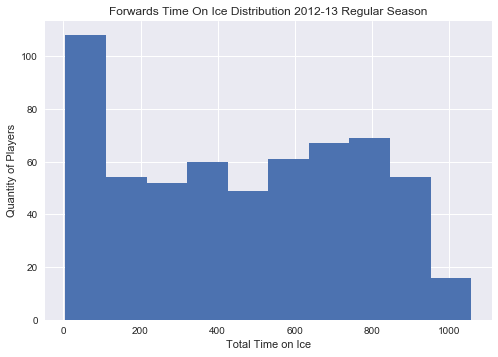

In [67]:
x2 = dfs.TTOI 
plt.title('Forwards Time On Ice Distribution 2012-13 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(110,115)
plt.hist(x2)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_forwards_toi.pdf')
plt.show()

- Players that have played less than 192 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as 4th line players.

In [68]:
low = dfs.copy()
low = low[low['TTOI'] < 110]
low.shape

(108, 48)

In [69]:
dfs = dfs[dfs['TTOI'] > 110]

In [70]:
dfs.shape

(482, 48)

In [71]:
#dfs.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/total_stats_forwards_nhl_positions.csv', index='False', sep=',')
#dfs.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/total_stats_forwards_nhl_positions.csv', index='False', sep=',')

## cluster for centers

In [161]:
dc = dfs.copy()
dc = dc[dc['Position'] == 'C']
dc.shape

(197, 48)

### standardization

- It is important to standardize the data so that we can effectively compare player performance. 
- Scale on-ice events per minute for each player relative to the league's season minimum and maximumn performance. All on-ice events per minute will have values between 0 and 1. 
- This technique makes sure that no particular event is being overweighted.

In [191]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
c = dc[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
c_scaled = scaler.fit_transform(c)

### dendrogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features.

In [192]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [193]:
sn.clustermap(c_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

- Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [194]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( c_scaled )
  cluster_errors.append( clusters.inertia_ )

In [195]:
clusters_dc = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dc[0:10]

,cluster_errors,num_clusters
0,1576.000000,1
1,1150.432566,2
2,987.184899,3
3,888.865295,4
4,811.330550,5
5,739.240427,6
6,698.302676,7
7,661.580664,8
8,622.172676,9
9,590.267194,10


In [196]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_centers_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dc.to_latex())
f.write(endtex)
f.close()

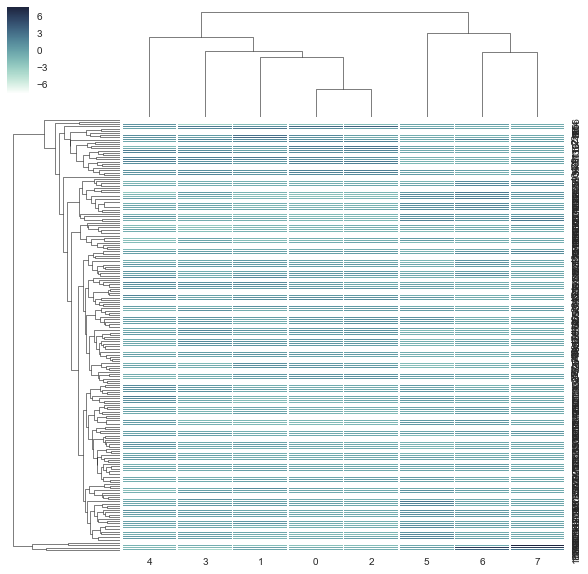

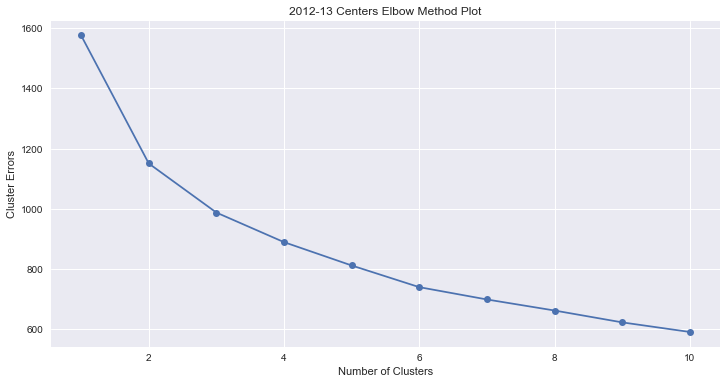

In [197]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dc.num_clusters, clusters_dc.cluster_errors, marker = "o" )
plt.title('2012-13 Centers Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_centers_eblow_plot.pdf')
plt.show()

### silhouette analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:
\begin{equation}
s(i)=\frac{b(i)−a(i)}{max[a(i),b(i)]}
\end{equation}

From the above definition it is clear that silhoutte score always lies between:

\begin{equation}
−1≤s(i)≤1−1≤s(i)≤1
\end{equation}
Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

For n_clusters = 2 The average silhouette_score is : 0.229781778654
For n_clusters = 3 The average silhouette_score is : 0.201741442848
For n_clusters = 4 The average silhouette_score is : 0.170887228632
For n_clusters = 5 The average silhouette_score is : 0.152573594185
For n_clusters = 6 The average silhouette_score is : 0.157492276206
For n_clusters = 7 The average silhouette_score is : 0.156527051882
For n_clusters = 8 The average silhouette_score is : 0.16037558383
For n_clusters = 9 The average silhouette_score is : 0.161164334972
For n_clusters = 10 The average silhouette_score is : 0.163945708975


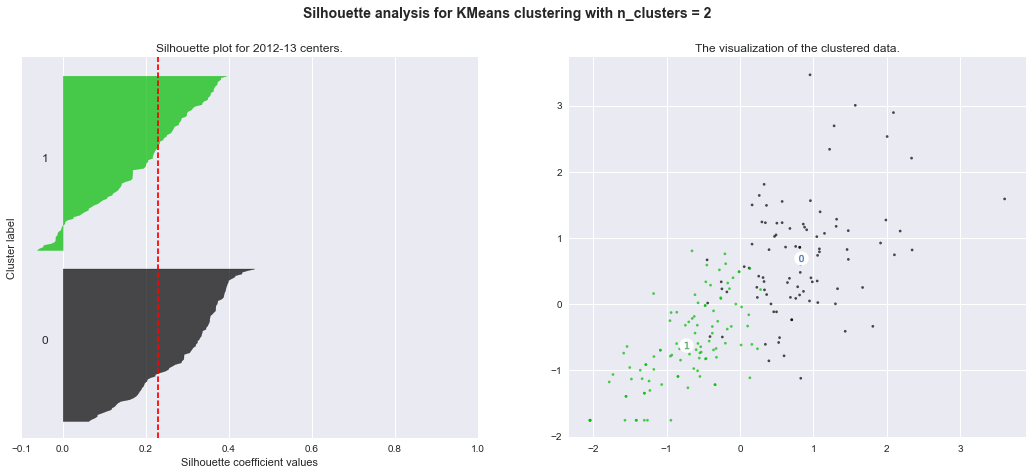

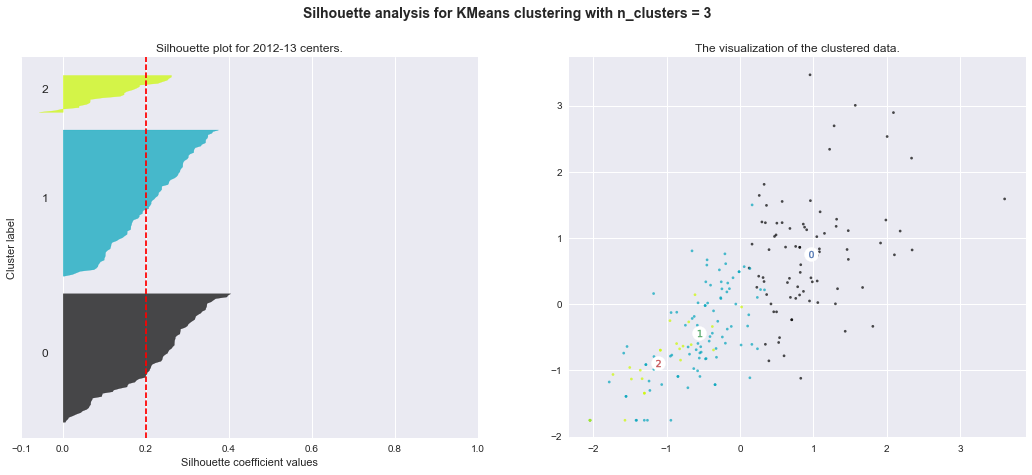

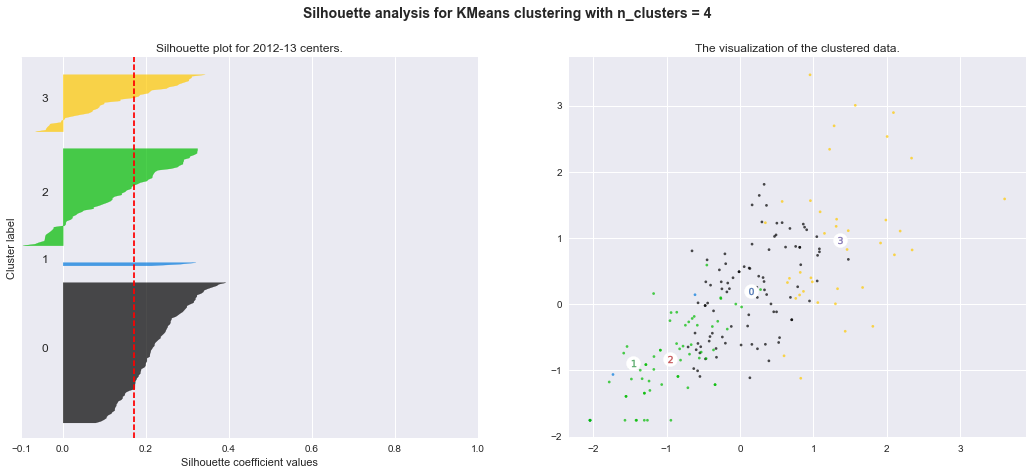

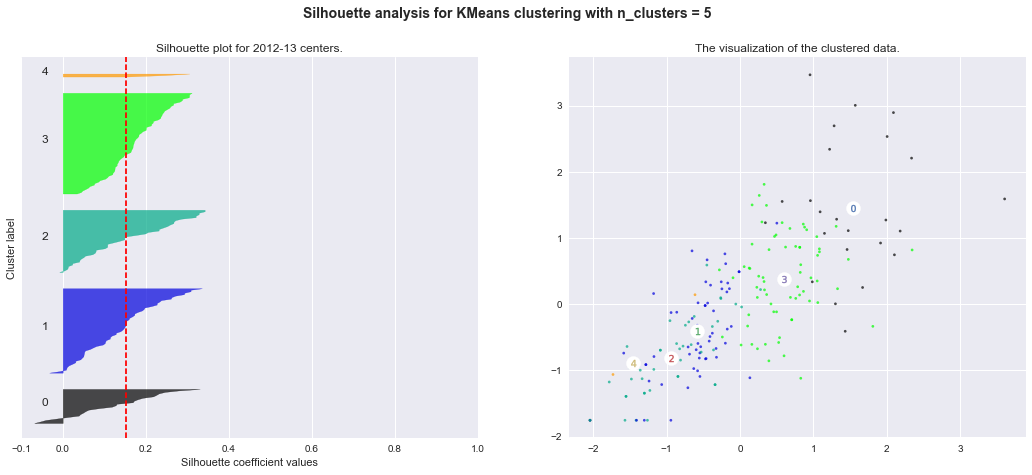

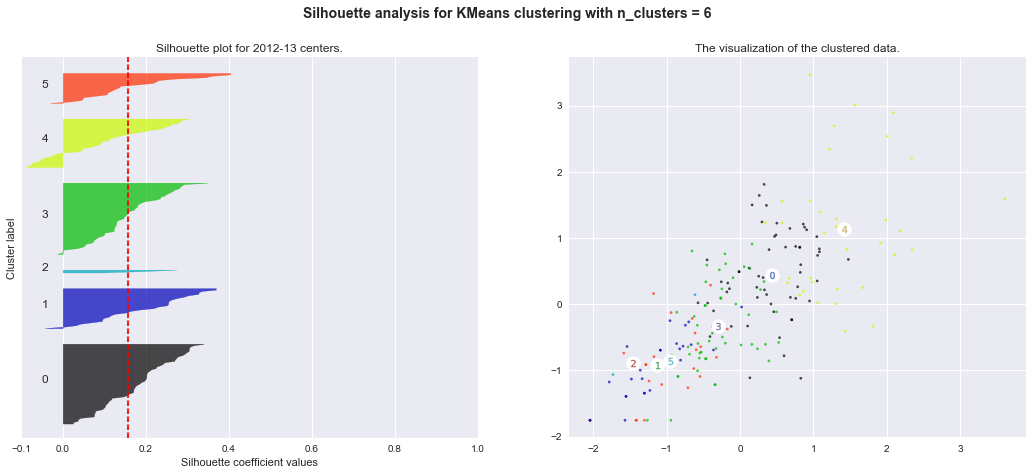

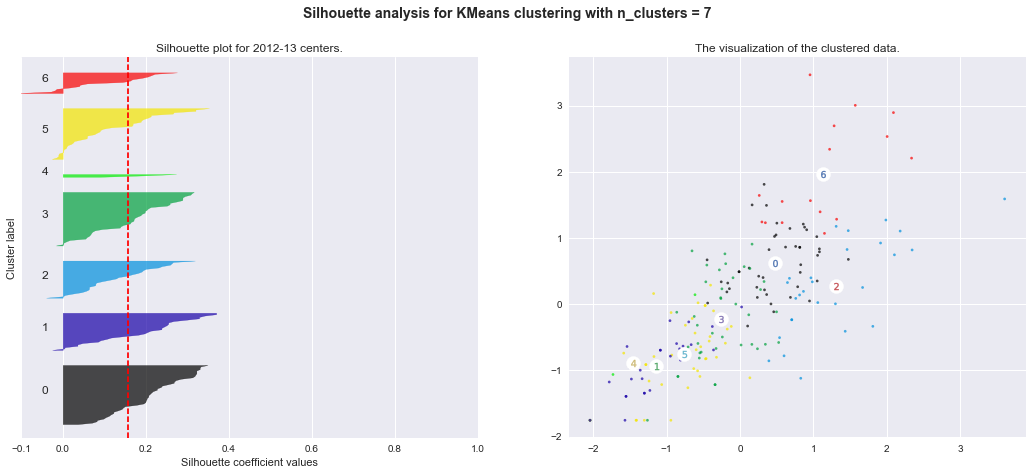

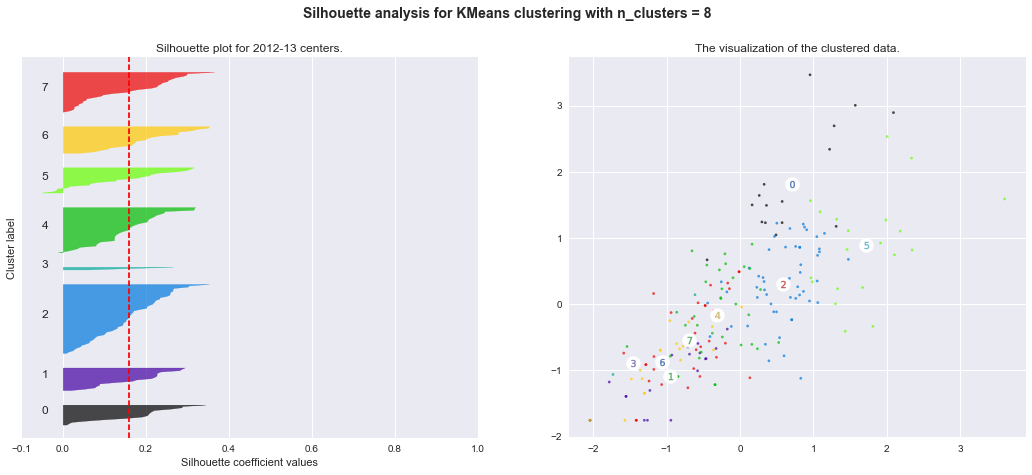

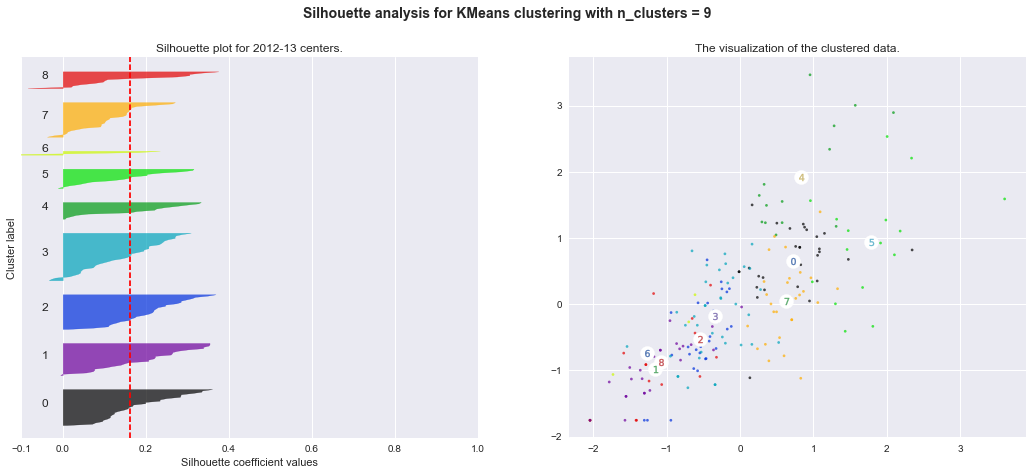

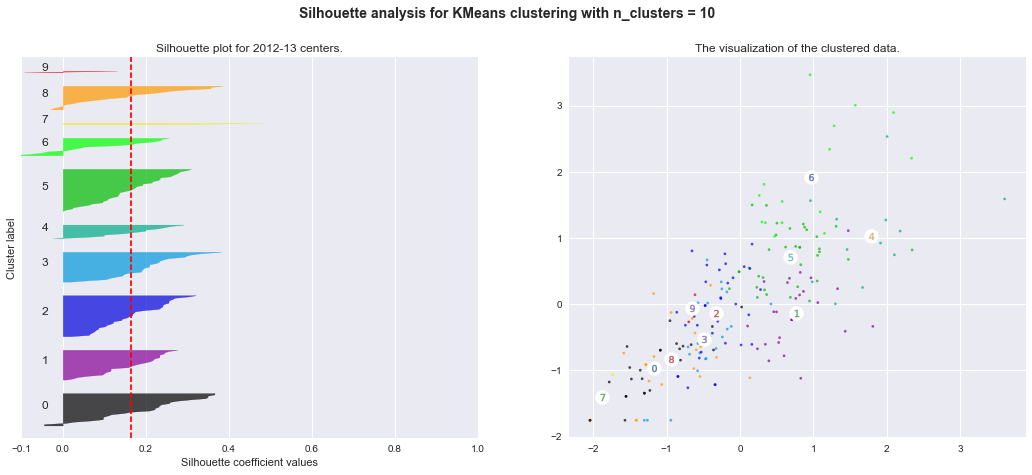

In [198]:
with PdfPages('test.pdf') as pdf:
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2*np.pi*t)
    s = s * 50

cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(c_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( c_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(c_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(c_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2012-13 centers.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(c_scaled[:, 0], c_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
 

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_centers_silhouette_analysis.pdf')
plt.show()

In [302]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(c_scaled)

clusters_dc = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dc['cluster']=kmeans.labels_

clusters_dc

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,1.098455,0.833445,0.992742,0.709590,0.494462,-0.524400,-0.446969,-0.188063
1,-0.730649,-0.619494,-0.619700,-0.795411,-0.017807,-0.483630,-0.199711,-0.280354
2,-0.084690,0.012314,-0.124317,0.192147,-0.157598,0.729425,-0.091792,-0.182528
3,-1.118088,-0.883201,-0.988733,-0.584052,-0.911515,0.764425,1.847127,1.546514


In [203]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_centers_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dc.to_latex())
f.write(endtex)
f.close()

### rank centers

The next step is to rank players based on clusters:

- **Cluster 2** is for **1st** line (Top 3). 
- **Cluster 1** is for **2nd** second line (Top 6). 
- **Cluster 0** is for **3rd** third line (Top 9)
- **Cluster 3** is for **4th** fourth line (Bottom 3)

In [303]:
dc['Rank'] = dc.apply(lambda x: 1 if (x['cluster'] == 0) else 2 if (x['cluster'] == 2) else 3 if (x['cluster'] == 1) else 4, axis=1)
dc = dc.sort_values(['TPoints'], ascending=[False])
dc['Rank'].value_counts()

1    64
2    56
3    53
4    24
Name: Rank, dtype: int64

In [310]:
c = dc.copy()
c = c[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIGoals', 'TOIAssists' , 'TOIShotsF', 'TOIShotsA', 'TOIDShots', 'TOIPlus/Minus', 'TOIGoalsF', 'TOIGoalsA', 'TOIBlocks', 'TOIHits', 'TTOI']]
c = c[c['Rank'] == 1]
c = c.sort_values(['TPoints', 'TOIPoints'], ascending=[False, False])
c.head()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIGoals,TOIAssists,TOIShotsF,TOIShotsA,TOIDShots,TOIPlus/Minus,TOIGoalsF,TOIGoalsA,TOIBlocks,TOIHits,TTOI
228,1,T.B,STEVEN STAMKOS,48,57.0,0.053926,0.027436,0.026490,0.508988,0.424787,0.084201,-0.001892,0.064333,0.049196,0.016083,0.059603,1057.0
19,1,PIT,SIDNEY CROSBY,36,56.0,0.073684,0.019737,0.053947,0.660526,0.430263,0.230263,0.036842,0.096053,0.028947,0.022368,0.027632,760.0
266,1,CAR,ERIC STAAL,48,53.0,0.052579,0.017857,0.034722,0.582341,0.510913,0.071429,0.009921,0.067460,0.046627,0.022817,0.033730,1008.0
261,1,WSH,MIKE RIBEIRO,48,49.0,0.057243,0.015187,0.042056,0.531542,0.482477,0.049065,-0.003505,0.078271,0.038551,0.032710,0.064252,856.0
464,1,ANA,RYAN GETZLAF,44,49.0,0.055118,0.016873,0.038245,0.529809,0.391451,0.138358,0.017998,0.068616,0.033746,0.047244,0.100112,889.0


## clusters for wingers

In [318]:
dw = dfs.copy()
dw = dw[dw['Position'] == 'W']
dw.shape

(285, 48)

### standardization

- It is important to standardize the data so that we can effectively compare player performance. 
- Scale on-ice events per minute for each player relative to the league's season minimum and maximumn performance. All on-ice events per minute will have values between 0 and 1. 
- This technique makes sure that no particular event is being overweighted.

In [426]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
w = dw[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
w_scaled = scaler.fit_transform(w)

### dendrogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features.

In [427]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [428]:
sn.clustermap(w_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

- Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [429]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( w_scaled )
  cluster_errors.append( clusters.inertia_ )

In [430]:
clusters_dw = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dw[0:10]

,cluster_errors,num_clusters
0,2280.000000,1
1,1632.187224,2
2,1369.160704,3
3,1241.453054,4
4,1146.027040,5
5,1067.465230,6
6,1010.582568,7
7,940.096981,8
8,892.439457,9
9,872.541324,10


In [431]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_wingers_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dw.to_latex())
f.write(endtex)
f.close()

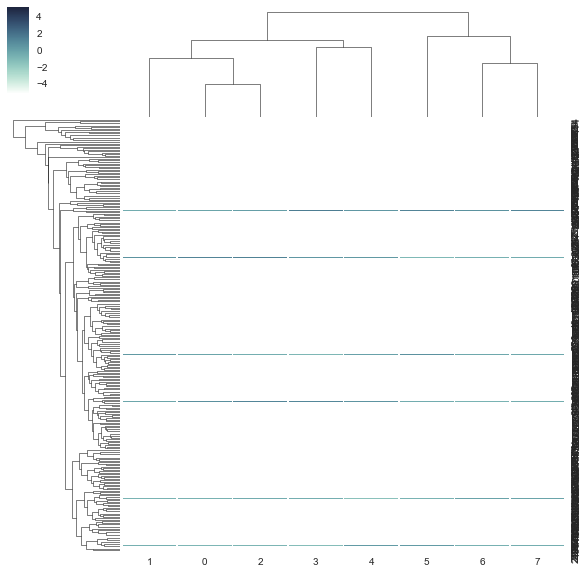

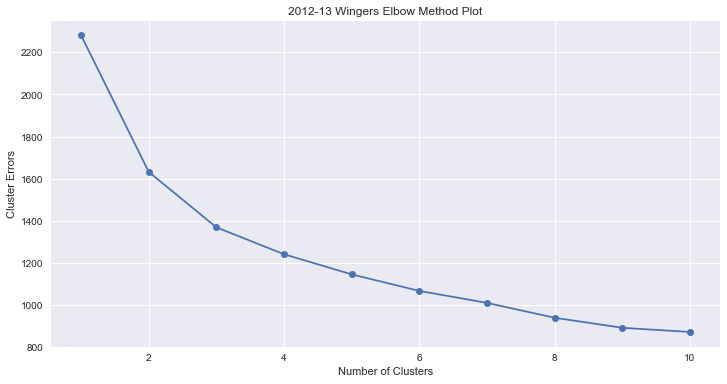

In [432]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dw.num_clusters, clusters_dw.cluster_errors, marker = "o" )
plt.title('2012-13 Wingers Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_wingers_eblow_plot.pdf')
plt.show()

### silhouette analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

Silhouette score of an observation is given by:
\begin{equation}
s(i)=\frac{b(i)−a(i)}{max[a(i),b(i)]}
\end{equation}

From the above definition it is clear that silhoutte score always lies between:

\begin{equation}
−1≤s(i)≤1−1≤s(i)≤1
\end{equation}
Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

For n_clusters = 2 The average silhouette_score is : 0.251589995407
For n_clusters = 3 The average silhouette_score is : 0.208751370526
For n_clusters = 4 The average silhouette_score is : 0.170517269731
For n_clusters = 5 The average silhouette_score is : 0.153241197306
For n_clusters = 6 The average silhouette_score is : 0.15511804479
For n_clusters = 7 The average silhouette_score is : 0.162198336061
For n_clusters = 8 The average silhouette_score is : 0.159821105159
For n_clusters = 9 The average silhouette_score is : 0.157534413807
For n_clusters = 10 The average silhouette_score is : 0.152289734389


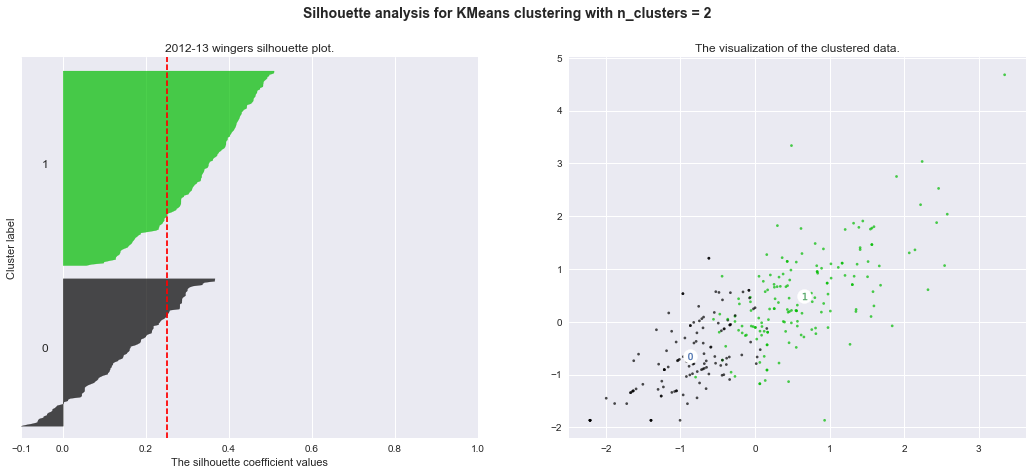

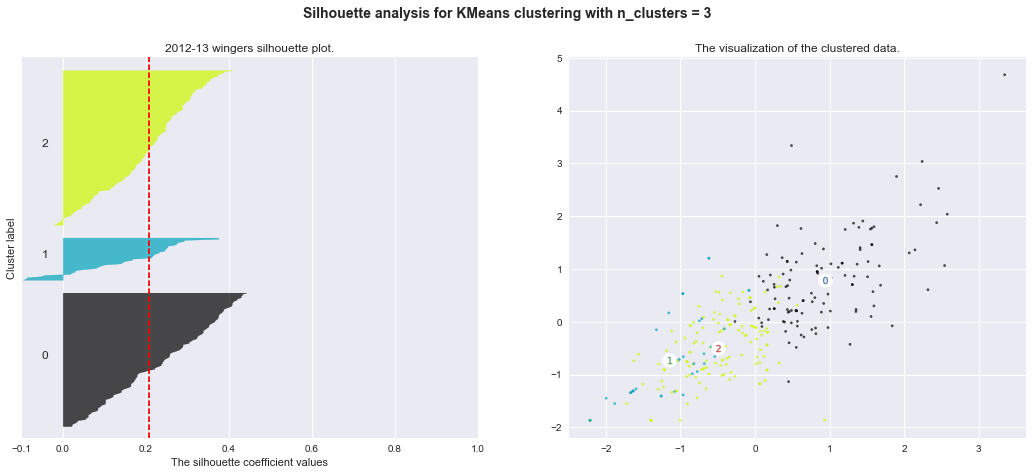

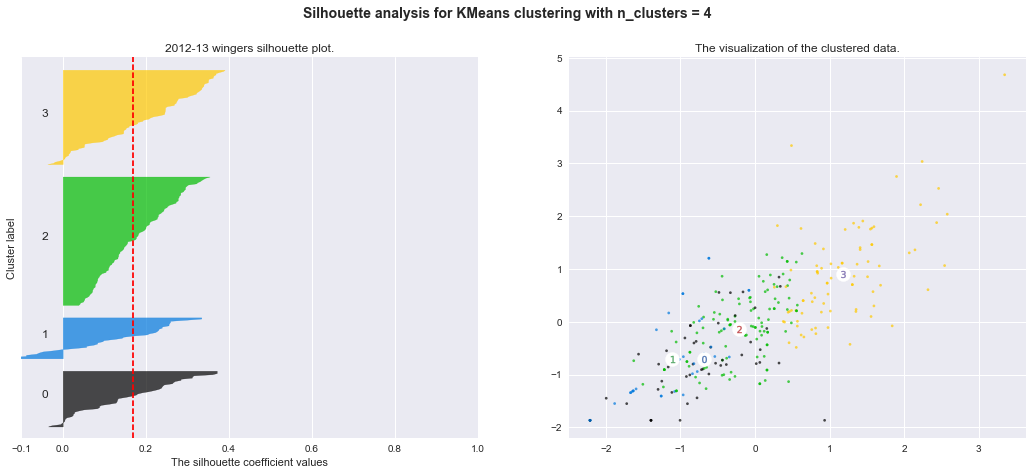

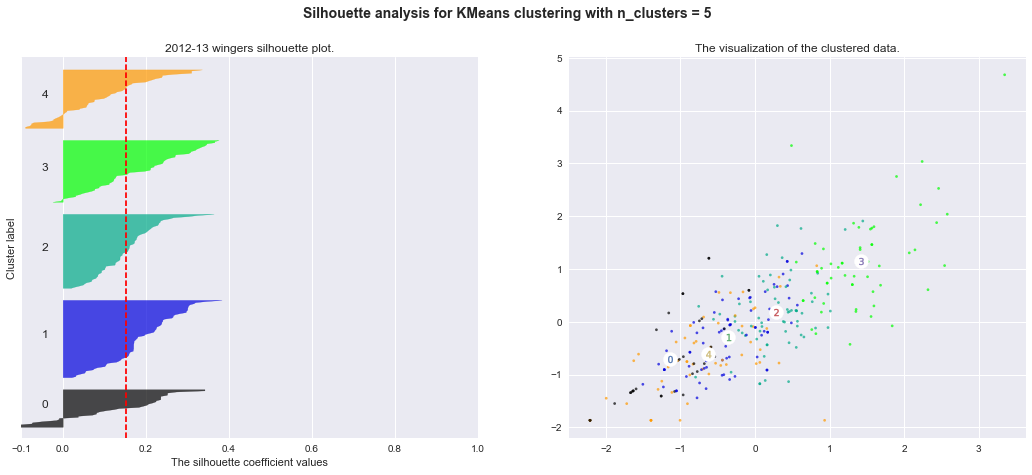

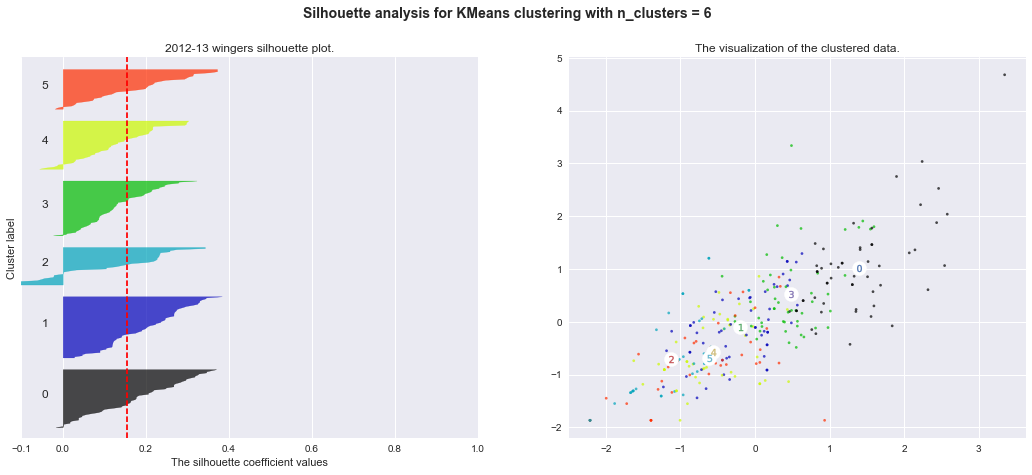

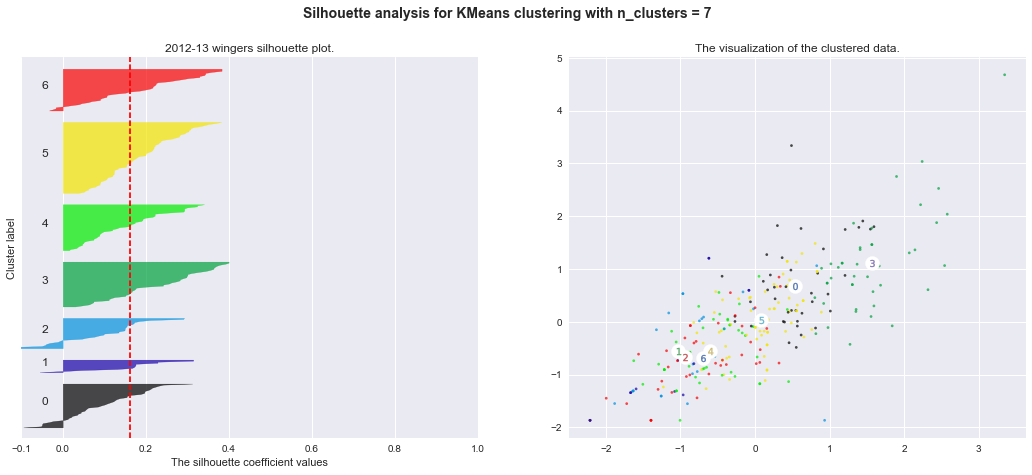

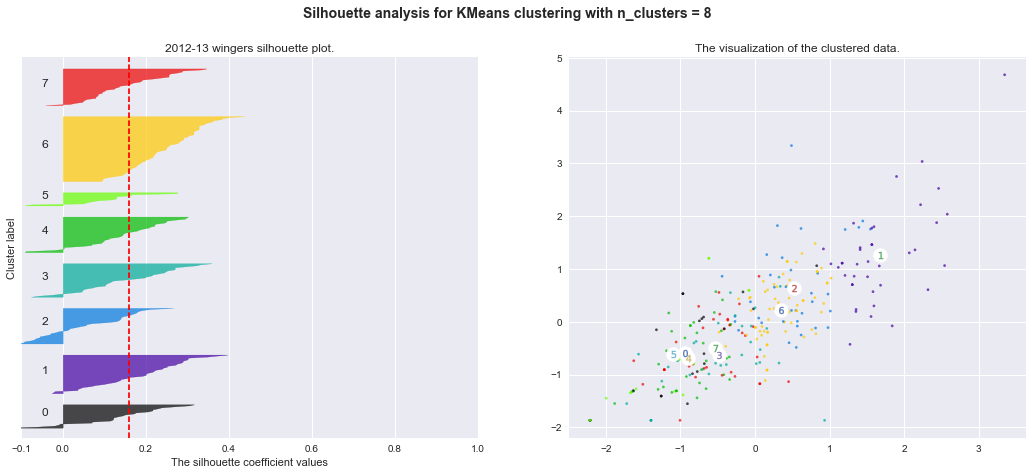

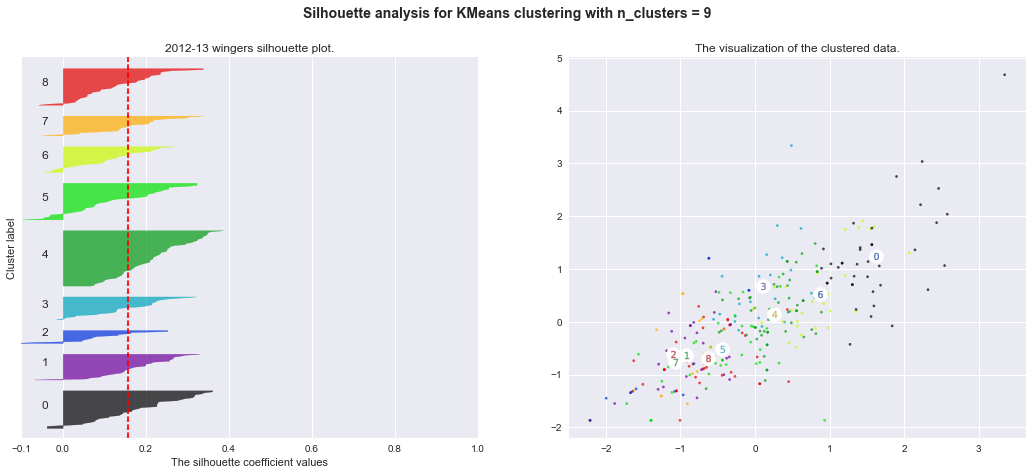

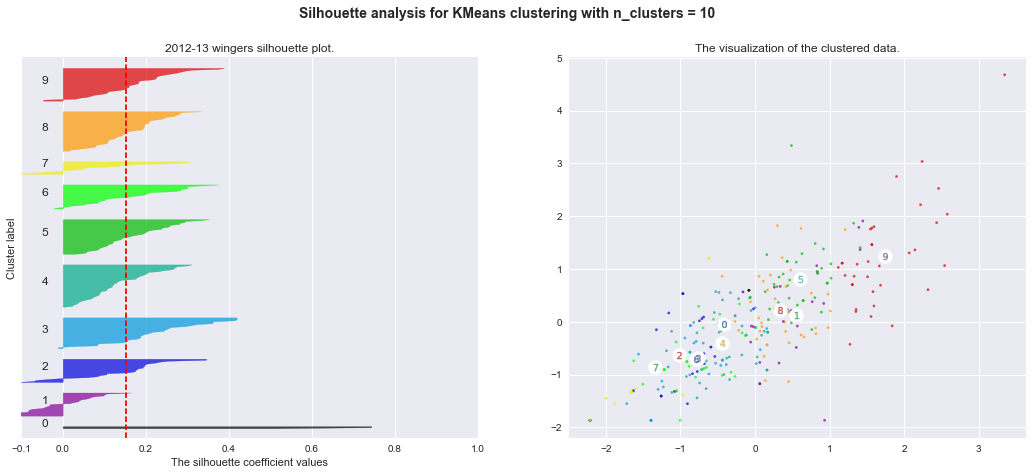

In [433]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(w_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( w_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(w_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(w_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("2012-13 wingers silhouette plot.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(w_scaled[:, 0], w_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
 

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

 
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_wingers_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering show that the number of clusters with the highest values of the eleven statistics used, are n = 2, 3, 4 with an average silhouette score of 0.294, 0.200, 0.196 respectfully.
<br>
This indicates that the most natural cluster size were within this range. From a hockey perspective, since there are 4 forward lines, the optimal number of clusters for centers, left and right wingers are 4. 

- Top Line
- Second Line
- Third Line
- Fourth Line

In [443]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(w_scaled)

clusters_dw = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dw['cluster']=kmeans.labels_

clusters_dw

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,-0.701697,-0.617454,-0.558655,-0.245834,-0.192319,0.752848,0.259790,-0.197723
1,1.298266,0.918626,1.203958,0.830521,0.438322,-0.295916,-0.528334,-0.335592
2,-1.191351,-0.764669,-1.164417,-0.781478,-0.913553,0.414923,1.861274,2.165000
3,0.049621,0.102685,-0.005423,-0.119072,0.152662,-0.518316,-0.459053,-0.338220


In [445]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_wingers_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dw.to_latex())
f.write(endtex)
f.close()

The table shows the 4 clusters broken out into the variables we input into the model. Cluster 1 is the cluster of top-performing forwards. Remember, these numbers are scaled, so the number points per time on ice (MPoints) cluster 1 forwards is 0.55 standard deviations above the mean for all forwards.

In [791]:
#clusters_dw.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_wingers.csv')
#clusters_dw.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_wingers.csv')

### rank wingers

The next step is to rank players based on clusters:

- **Cluster 0** is for **1st** line (Top 3). 
- **Cluster 3** is for **2nd** second line (Top 6). 
- **Cluster 1** is for **3rd** third line (Top 9)
- **Cluster 2** is for **4th** fourth line (Bottom 3)

In [444]:
dw['Rank'] = dw.apply(lambda x: 1 if (x['cluster'] == 1) else 2 if (x['cluster'] == 3) else 3 if (x['cluster'] == 0) else 4, axis=1)
dw = dw.sort_values(['TPoints'], ascending=[False])
dw['Rank'].value_counts()

2    102
3     79
1     70
4     34
Name: Rank, dtype: int64

In [446]:
w2 = dw.copy()
w2 = w2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIGoals', 'TOIAssists' , 'TOIShotsF', 'TOIShotsA', 'TOIDShots', 'TOIPlus/Minus', 'TOIGoalsF', 'TOIGoalsA', 'TOIBlocks', 'TOIHits', 'TTOI']]
w2 = w2[w2['Rank'] == 2]
w2 = w2.sort_values(['TPoints', 'TOIPoints'], ascending=[False, False])
w2.tail(10)

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIGoals,TOIAssists,TOIShotsF,TOIShotsA,TOIDShots,TOIPlus/Minus,TOIGoalsF,TOIGoalsA,TOIBlocks,TOIHits,TTOI
609,2,PHI,TYE MCGINN,18,5.0,0.021834,0.013100,0.008734,0.563319,0.362445,0.200873,0.000000,0.043668,0.030568,0.004367,0.082969,229.0
882,2,ANA,RADEK DVORAK,9,4.0,0.033898,0.033898,0.000000,0.389831,0.440678,-0.050847,0.008475,0.025424,0.016949,0.008475,0.016949,118.0
827,2,T.B,ONDREJ PALAT,14,4.0,0.024390,0.012195,0.012195,0.414634,0.506098,-0.091463,0.030488,0.048780,0.024390,0.006098,0.170732,164.0
691,2,FLA,KRIS VERSTEEG,10,4.0,0.023669,0.011834,0.011834,0.408284,0.431953,-0.023669,-0.047337,0.035503,0.076923,0.017751,0.029586,169.0
602,2,CAR,KEVIN WESTGARTH,31,4.0,0.022599,0.011299,0.011299,0.406780,0.440678,-0.033898,0.005650,0.028249,0.022599,0.005650,0.158192,177.0
792,2,VAN,DAVID BOOTH,12,3.0,0.019608,0.006536,0.013072,0.503268,0.372549,0.130719,-0.019608,0.026144,0.045752,0.006536,0.156863,153.0
206,2,N.J,STEFAN MATTEAU,17,3.0,0.019231,0.006410,0.012821,0.461538,0.435897,0.025641,-0.006410,0.025641,0.032051,0.006410,0.160256,156.0
268,2,CAR,ZACH BOYCHUK,13,2.0,0.012500,0.006250,0.006250,0.450000,0.350000,0.100000,-0.006250,0.037500,0.037500,0.012500,0.062500,160.0
714,2,PIT,ZACH BOYCHUK,13,2.0,0.012500,0.006250,0.006250,0.450000,0.350000,0.100000,-0.006250,0.037500,0.037500,0.012500,0.062500,160.0
840,2,NSH,ZACH BOYCHUK,13,2.0,0.012500,0.006250,0.006250,0.450000,0.350000,0.100000,-0.006250,0.037500,0.037500,0.012500,0.062500,160.0


# Defensemen

In [447]:
dwd = da.copy()
dwd = dwd[dwd['Position'] == 'D']
dwd = dwd.sort_values(['TGP', 'TTOI'], ascending=[True, True])
dwd.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
806,2012,CAR,MARC-ANDRE GRAGNANI,D,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,5,-2,3,5,-2,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.375000,0.625000,-0.250000,0.375000,0.625000,-0.250000,0.000000,0.000000,0.0,0.000000,0.125000,0.000000
694,2012,S.J,NICK PETRECKI,D,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,1,0,2.0,1.0,0.0,1.0,2.0,0.0,12.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.083333,0.000000,0.166667,0.083333,0.0,0.083333,0.166667,0.000000
852,2012,WSH,CAMERON SCHILLING,D,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,3,5,-2,3,5,-2,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,-0.083333,0.0,0.250000,0.416667,-0.166667,0.250000,0.416667,-0.166667,0.083333,0.000000,0.0,0.000000,0.000000,0.000000
962,2012,N.J,ALEXANDER URBOM,D,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,4,7,-3,4,6,-2,1.0,1.0,0.0,1.0,2.0,1.0,14.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.071429,-0.071429,0.0,0.285714,0.500000,-0.214286,0.285714,0.428571,-0.142857,0.071429,0.071429,0.0,0.071429,0.142857,0.071429
973,2012,T.B,MATHIEU ROY,D,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,5,11,-6,5,11,-6,0.0,0.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.071429,-0.071429,0.0,0.357143,0.785714,-0.428571,0.357143,0.785714,-0.428571,0.000000,0.000000,0.0,0.000000,0.000000,0.071429


In [448]:
dwd.shape

(305, 48)

## defensemen time on ice distribution

- time on ice distribution will determine the quantity of players to include in the cluster analysis. Players that have played a signficant low total of minutes will be excluded from clustering and assign directly to the bottom defensive pairing.

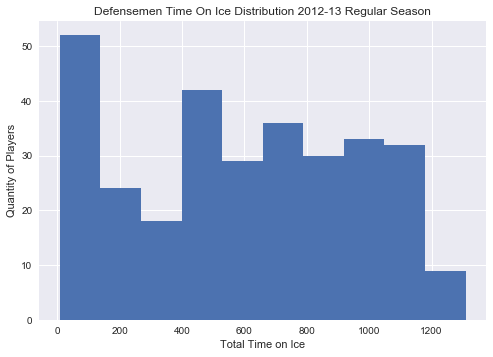

In [453]:
x3 = dwd.TTOI 
plt.title('Defensemen Time On Ice Distribution 2012-13 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(135,140)
plt.hist(x3)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_defensemen_toi.pdf')
plt.show()

- Defensemen that have played less than 140 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as 3rd pairing defensemen.

In [455]:
low = dwd.copy()
low = low[low['TTOI'] < 140]
low.shape

(52, 48)

In [456]:
dwd = dwd[dwd['TTOI'] > 140]
dwd.shape

(253, 48)

In [457]:
dwd.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
951,2012,OTT,JARED COWEN,D,7,1.0,0.0,1.0,3.0,3.0,3.0,2.0,1.0,7.0,65,63,2,61,48,13,10.0,26.0,10.0,4.0,4.0,3.0,142.0,0.007042,0.000000,0.007042,0.021127,0.021127,0.021127,0.014085,0.007042,0.049296,0.457746,0.443662,0.014085,0.429577,0.338028,0.091549,0.070423,0.183099,0.070423,0.028169,0.028169,0.021127
707,2012,WPG,ZACH REDMOND,D,8,1.0,3.0,4.0,5.0,5.0,4.0,4.0,0.0,12.0,75,47,28,70,41,29,8.0,12.0,12.0,1.0,5.0,6.0,157.0,0.006369,0.019108,0.025478,0.031847,0.031847,0.025478,0.025478,0.000000,0.076433,0.477707,0.299363,0.178344,0.445860,0.261146,0.184713,0.050955,0.076433,0.076433,0.006369,0.031847,0.038217
584,2012,BOS,AARON JOHNSON,D,10,0.0,0.0,0.0,4.0,5.0,4.0,4.0,0.0,8.0,81,57,24,81,53,28,5.0,18.0,10.0,0.0,7.0,3.0,149.0,0.000000,0.000000,0.000000,0.026846,0.033557,0.026846,0.026846,0.000000,0.053691,0.543624,0.382550,0.161074,0.543624,0.355705,0.187919,0.033557,0.120805,0.067114,0.000000,0.046980,0.020134
876,2012,BOS,MATT BARTKOWSKI,D,11,0.0,2.0,2.0,5.0,5.0,5.0,5.0,0.0,9.0,77,74,3,77,72,5,3.0,11.0,6.0,1.0,5.0,8.0,148.0,0.000000,0.013514,0.013514,0.033784,0.033784,0.033784,0.033784,0.000000,0.060811,0.520270,0.500000,0.020270,0.520270,0.486486,0.033784,0.020270,0.074324,0.040541,0.006757,0.033784,0.054054
730,2012,CBJ,CODY GOLOUBEF,D,11,1.0,0.0,1.0,2.0,6.0,2.0,5.0,-3.0,13.0,84,68,16,82,67,15,8.0,10.0,0.0,0.0,1.0,2.0,163.0,0.006135,0.000000,0.006135,0.012270,0.036810,0.012270,0.030675,-0.018405,0.079755,0.515337,0.417178,0.098160,0.503067,0.411043,0.092025,0.049080,0.061350,0.000000,0.000000,0.006135,0.012270


## clusters for defensemen

In [482]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
d = dwd[['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties']]
d_scaled = scaler.fit_transform(d)

### dendrogram

In [483]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [484]:
sn.clustermap(d_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

In [485]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( d_scaled )
  cluster_errors.append( clusters.inertia_ )

In [486]:
clusters_dwd = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dwd[0:10]

,cluster_errors,num_clusters
0,2024.000000,1
1,1537.841560,2
2,1334.414992,3
3,1214.852221,4
4,1125.749938,5
5,1047.876313,6
6,1009.601565,7
7,957.675873,8
8,917.970188,9
9,879.886125,10


In [487]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_defensemen_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dwd.to_latex())
f.write(endtex)
f.close()

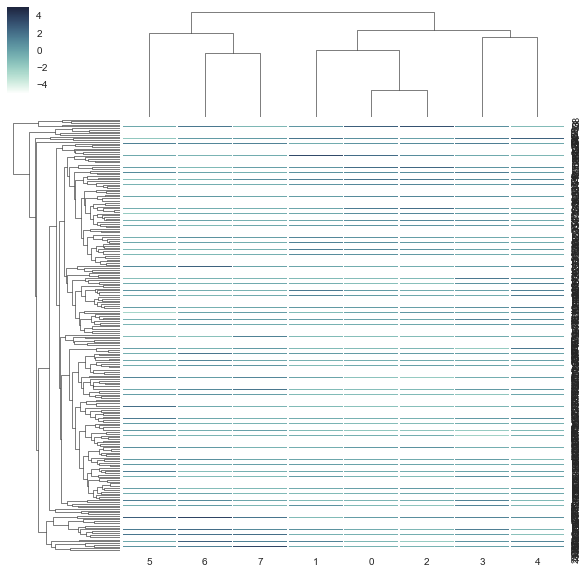

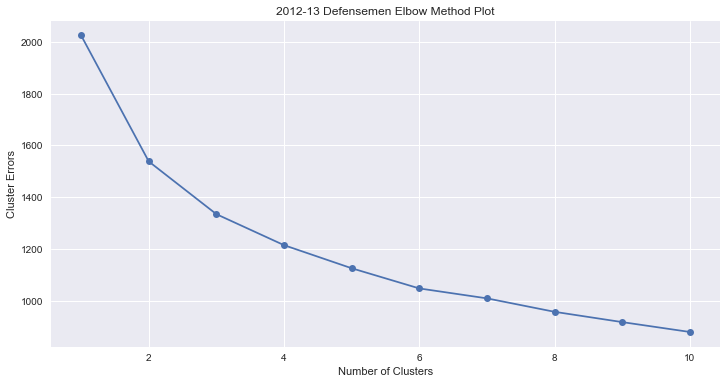

In [488]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dwd.num_clusters, clusters_dwd.cluster_errors, marker = "o" )
plt.title('2012-13 Defensemen Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_defensemen_eblow_plot.pdf')
plt.show()

### silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.210312789566
For n_clusters = 3 The average silhouette_score is : 0.184916907762
For n_clusters = 4 The average silhouette_score is : 0.159361963076
For n_clusters = 5 The average silhouette_score is : 0.137559399298
For n_clusters = 6 The average silhouette_score is : 0.143393397111
For n_clusters = 7 The average silhouette_score is : 0.126011510964
For n_clusters = 8 The average silhouette_score is : 0.13381103408
For n_clusters = 9 The average silhouette_score is : 0.133234620474
For n_clusters = 10 The average silhouette_score is : 0.129940459531


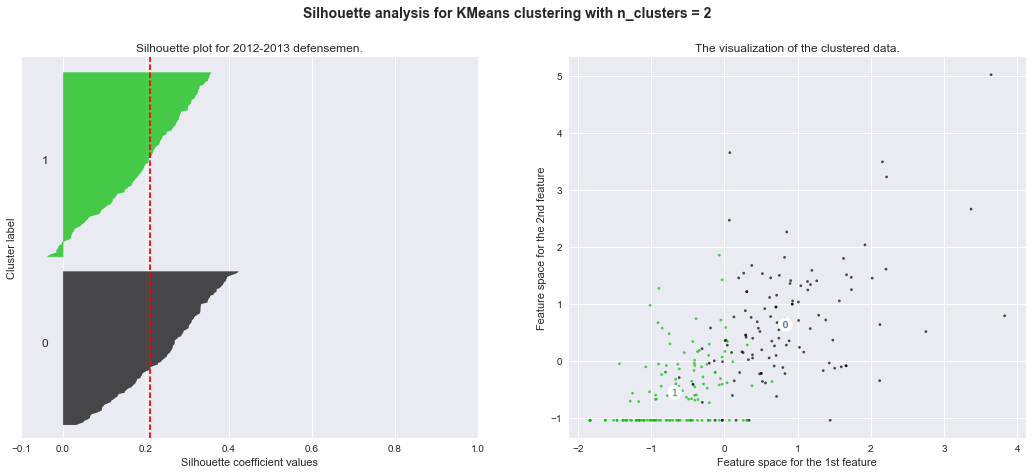

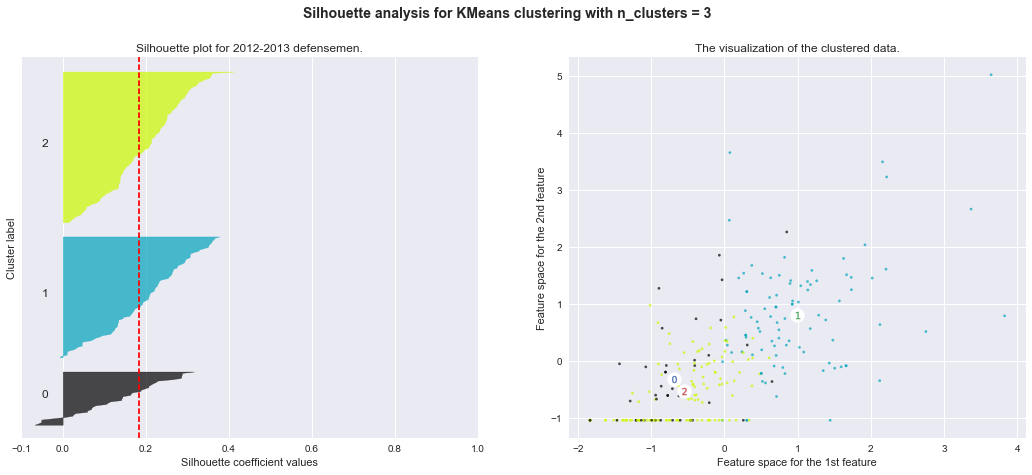

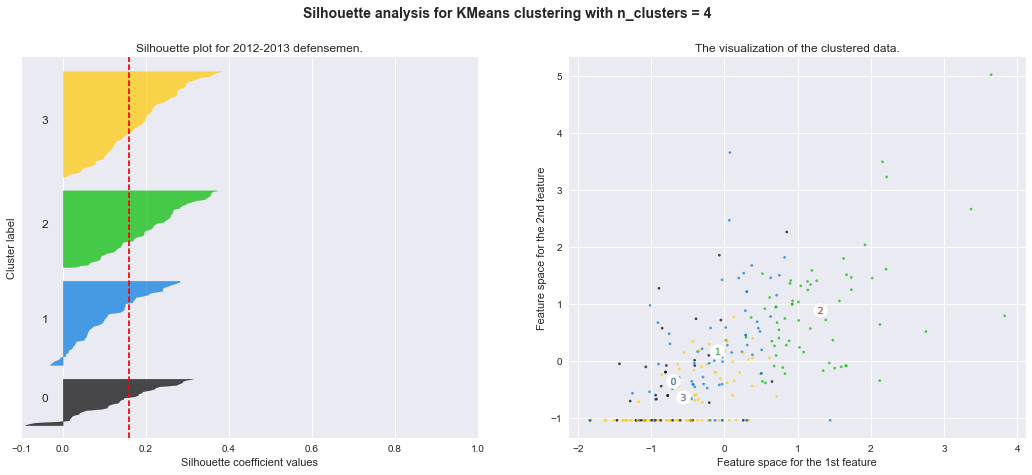

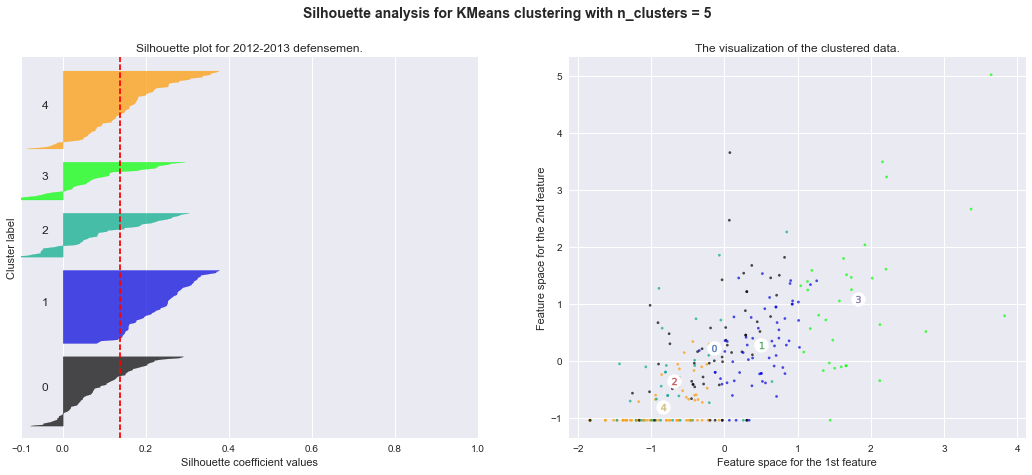

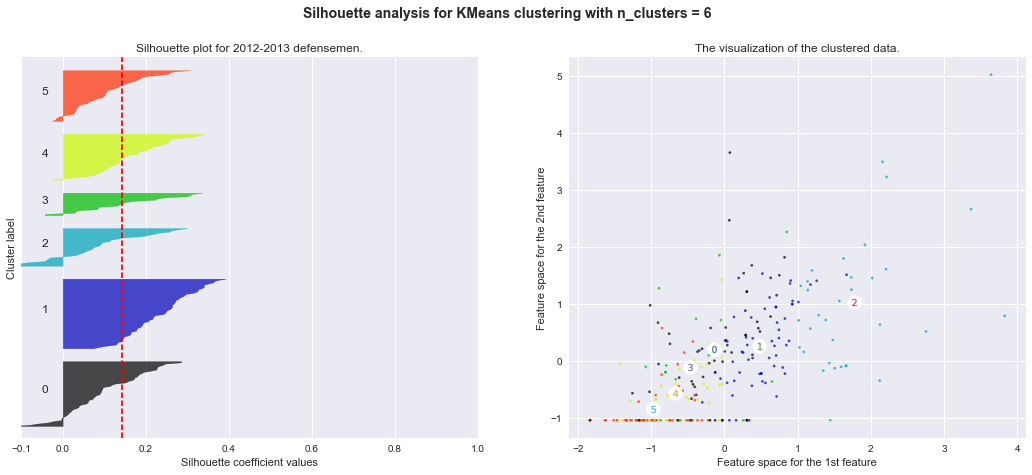

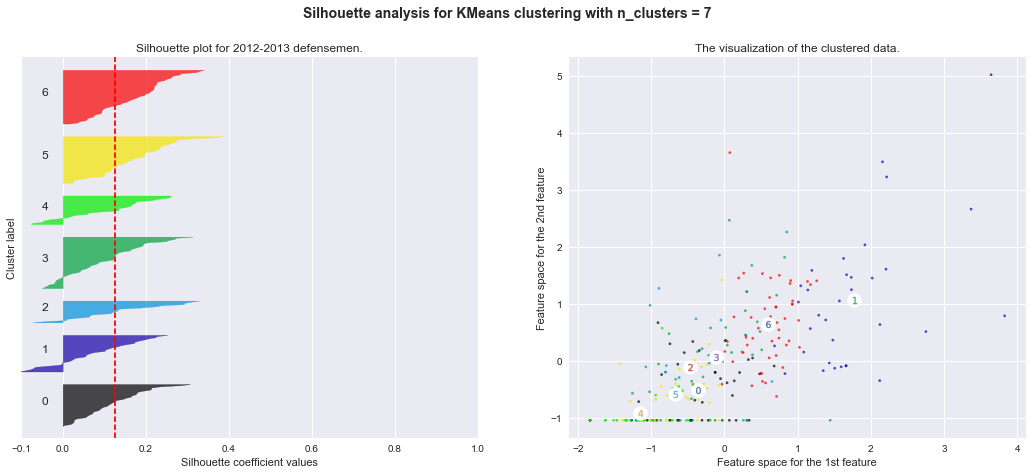

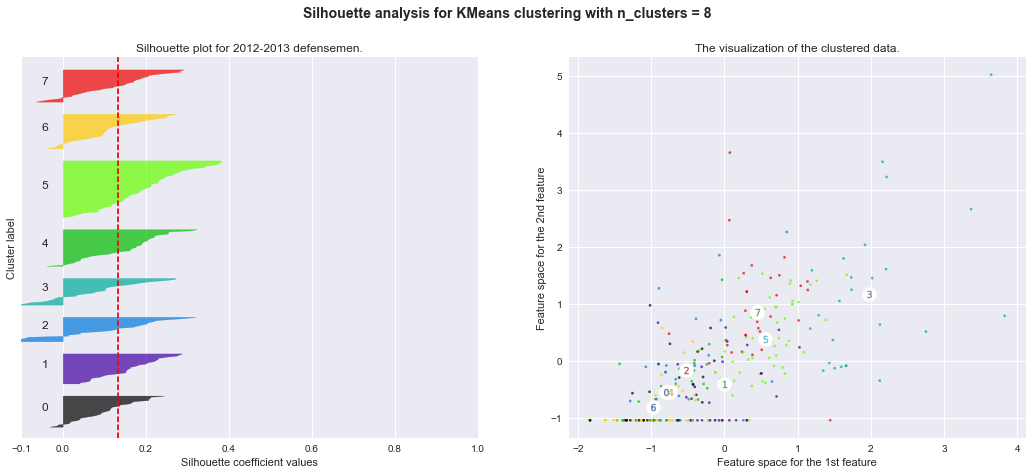

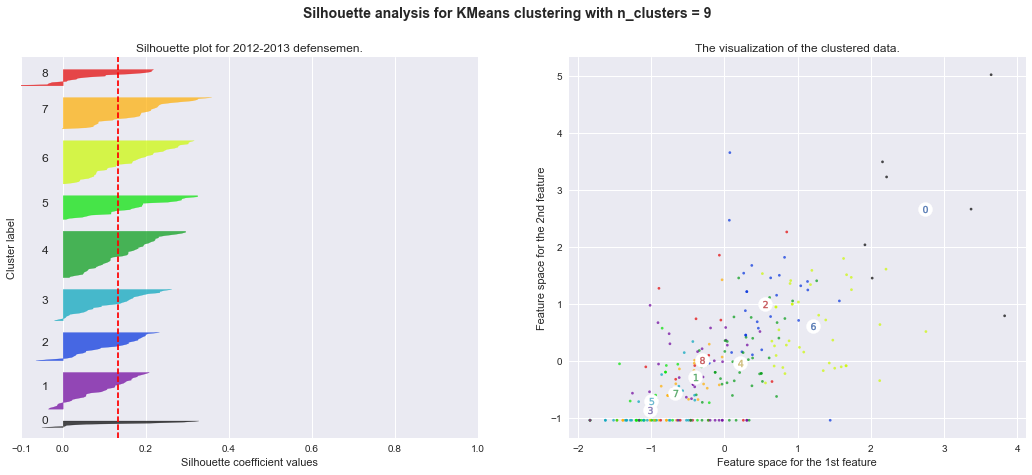

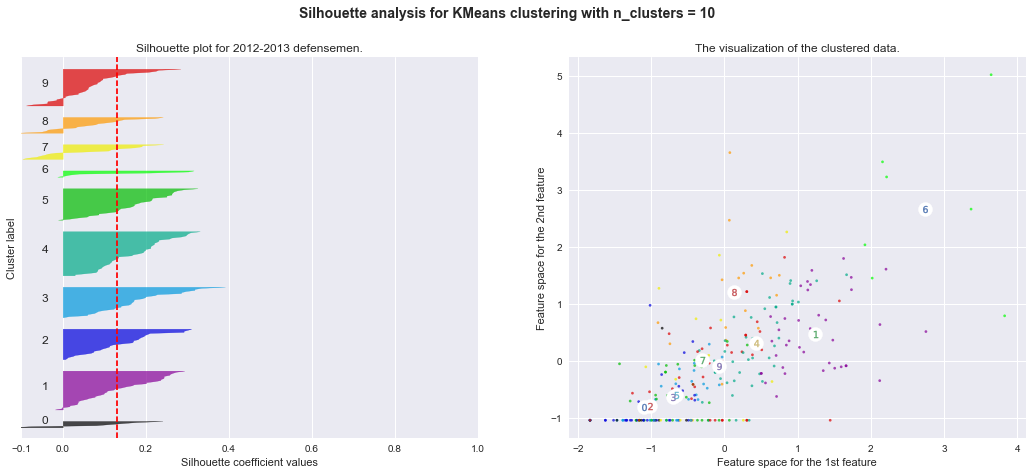

In [489]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(d_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( d_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(d_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(d_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2012-2013 defensemen.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(d_scaled[:, 0], d_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_defensemen_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering of defensemen shows that the number of clusters with the highest values of the eleven statistics used, are $n$ = 2, 3, 4. These clusters have an average silhouette score of 0.249, 0.173 and 0.141 respectfully. 
This indicates that the most natural cluster size were within this range. From a hockey perspective, since there are 3 defensive pairings, the optimal number of clusters for left and right defensemen are 3. 
- Top Two Defensive Pairing (LD, RD)
- Top Four Defensive Pairing (LD, RD)
- Bottom Defensive Pairing (LD, RD)


In [490]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(d_scaled)

clusters_dwd = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TOIPoints', 'TOIGoals', 'TOIAssists', 'TOIPlus/Minus', 'TOIEVDShots', 'TOIBlocks', 'TOIHits', 'TOIPenalties'])

dwd['cluster']=kmeans.labels_

clusters_dwd

,TOIPoints,TOIGoals,TOIAssists,TOIPlus/Minus,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties
0,1.029646,0.850994,0.872005,0.378054,0.284999,-0.462488,-0.441281,-0.312446
1,-0.683499,-0.315191,-0.708545,-0.253002,-0.105481,0.767624,1.512838,1.631266
2,-0.528605,-0.523565,-0.402658,-0.193379,-0.175369,0.077551,-0.196892,-0.333826


In [491]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_defensemen_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dwd.to_latex())
f.write(endtex)
f.close()

In [492]:
#clusters_dwd.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_defensemen.csv')
#clusters_dwd.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_defensemen.csv')

The table shows the 3 clusters broken out into the variables we input into the model. Cluster 1 is the cluster of top-performing defensemen. Remember, these numbers are scaled, so the number points per time on ice (MPoints) cluster 1 defesemen is 0.59 standard deviations above the mean for all defensemen.

### rank defensemen

The next step is to rank players based on clusters:

- **Cluster 1** is for **1st** pairing defensemen (Top 2). 
- **Cluster 2** is for **2nd** pairing defensemen (Top 4). 
- **Cluster 0** is for **3rd** pairing defensemen (Bottom 2)

display the number of players per rank

In [493]:
dwd['Rank'] = dwd.apply(lambda x: 1 if (x['cluster'] == 0) else 2 if (x['cluster'] == 2) else 3, axis=1)
dwd = dwd.sort_values(['TPoints'], ascending=[False])
dwd['Rank'].value_counts()

2    121
1     90
3     42
Name: Rank, dtype: int64

In [495]:
d2 = dwd.copy()
d2 = d2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TOIPoints', 'TOIHits', 'TOIBlocks', 'TTOI']]
d2 = d2[d2['Rank'] == 1]
d2 = d2.sort_values(['TPoints', 'TOIPoints'], ascending=[False, False])
d2.head()

,Rank,TeamCode,PlayerName,TGP,TPoints,TOIPoints,TOIHits,TOIBlocks,TTOI
29,1,PIT,KRIS LETANG,35,38.0,0.042363,0.050167,0.062430,897.0
716,1,MTL,PK SUBBAN,42,38.0,0.038934,0.052254,0.046107,976.0
442,1,MIN,RYAN SUTER,48,32.0,0.024446,0.025210,0.056532,1309.0
416,1,PHX,KEITH YANDLE,48,30.0,0.028090,0.016854,0.037453,1068.0
156,1,MTL,ANDREI MARKOV,48,30.0,0.025907,0.018998,0.050950,1158.0


# Goaltenders

In [497]:
dglt = da.copy()
dglt = dglt[dglt['Position'] == 'G']
dglt.head()

,Season,TeamCode,PlayerName,Position,TGP,TGoals,TAssists,TPoints,TGoalsF,TGoalsA,TEVGoalsF,TEVGoalsA,TPlus/Minus,TShots,TShotsF,TShotsA,TDShots,TEVShotsF,TEVShotsA,TEVDShots,TBlocks,THits,TPenalties,TTakeaways,TGiveaways,TMisses,TTOI,TOIGoals,TOIAssists,TOIPoints,TOIGoalsF,TOIGoalsA,TOIEVGoalsF,TOIEVGoalsA,TOIPlus/Minus,TOIShots,TOIShotsF,TOIShotsA,TOIDShots,TOIEVShotsF,TOIEVShotsA,TOIEVDShots,TOIBlocks,TOIHits,TOIPenalties,TOITakeaways,TOIGiveaways,TOIMisses
5,2012,PHI,ILYA BRYZGALOV,G,40,0.0,3.0,3.0,73.0,105.0,73.0,80.0,-7.0,0.0,881,1039,-158,881,867,14,0.0,0.0,0.0,0.0,15.0,0.0,2298.0,0.0,0.001305,0.001305,0.031767,0.045692,0.031767,0.034813,-0.003046,0.0,0.383377,0.452132,-0.068755,0.383377,0.377285,0.006092,0.0,0.0,0.000000,0.000000,0.006527,0.0
24,2012,PIT,MARC-ANDRE FLEURY,G,33,0.0,2.0,2.0,70.0,73.0,70.0,53.0,17.0,0.0,746,866,-120,746,730,16,0.0,0.0,2.0,0.0,15.0,0.0,1858.0,0.0,0.001076,0.001076,0.037675,0.039290,0.037675,0.028525,0.009150,0.0,0.401507,0.466093,-0.064586,0.401507,0.392896,0.008611,0.0,0.0,0.001076,0.000000,0.008073,0.0
43,2012,OTT,CRAIG ANDERSON,G,24,0.0,0.0,0.0,39.0,40.0,39.0,30.0,9.0,0.0,655,661,-6,655,528,127,0.0,0.0,0.0,0.0,15.0,0.0,1421.0,0.0,0.000000,0.000000,0.027445,0.028149,0.027445,0.021112,0.006334,0.0,0.460943,0.465165,-0.004222,0.460943,0.371569,0.089374,0.0,0.0,0.000000,0.000000,0.010556,0.0
62,2012,WPG,ONDREJ PAVELEC,G,44,0.0,0.0,0.0,94.0,117.0,94.0,91.0,3.0,0.0,1030,1226,-196,1030,1063,-33,0.0,0.0,0.0,0.0,18.0,0.0,2553.0,0.0,0.000000,0.000000,0.036819,0.045828,0.036819,0.035644,0.001175,0.0,0.403447,0.480219,-0.076772,0.403447,0.416373,-0.012926,0.0,0.0,0.000000,0.000000,0.007051,0.0
81,2012,CHI,COREY CRAWFORD,G,30,0.0,0.0,0.0,71.0,54.0,71.0,42.0,29.0,0.0,750,751,-1,750,635,115,0.0,0.0,4.0,1.0,9.0,0.0,1761.0,0.0,0.000000,0.000000,0.040318,0.030664,0.040318,0.023850,0.016468,0.0,0.425894,0.426462,-0.000568,0.425894,0.360591,0.065304,0.0,0.0,0.002271,0.000568,0.005111,0.0


- calculate saves for each goaltender for the season.

In [498]:
dglt['TSaves'] = dglt['TShotsA'] - dglt['TGoalsA']
dglt['TEVSaves'] = dglt['TEVShotsA'] - dglt['TEVGoalsA']

- compute save ratio and goal against ratio for all situations and even strength situations respectfully.

In [499]:
dglt['TSaveShotARatio'] = dglt['TSaves']/dglt['TShotsA']
dglt['TShotGoalARatio'] = dglt['TShotsA']/dglt['TGoalsA']

dglt['TEVSaveShotARatio'] = dglt['TEVSaves']/dglt['TEVShotsA']
dglt['TEVShotGoalARatio'] = dglt['TEVShotsA']/dglt['TEVGoalsA']

dglt['TSaveShotARatio'] = dglt['TSaveShotARatio'].round(3)
dglt['TShotGoalARatio'] = dglt['TShotGoalARatio'].round(3)
dglt['TEVSaveShotARatio'] = dglt['TEVSaveShotARatio'].round(3)
dglt['TEVShotGoalARatio'] = dglt['TEVShotGoalARatio'].round(3)

- scale all variables by time on ice.

In [500]:
dglt['TOISaves'] = dglt['TSaves']/dglt['TTOI']
dglt['TOIEVSaves'] = dglt['TEVSaves']/dglt['TTOI']

dglt['TOISaveShotARatio'] = dglt['TSaveShotARatio']/dglt['TTOI']
dglt['TOIShotGoalARatio'] = dglt['TShotGoalARatio']/dglt['TTOI']

dglt['TOIEVSaveShotARatio'] = dglt['TEVSaveShotARatio']/dglt['TTOI']
dglt['TOIEVShotGoalARatio'] = dglt['TEVShotGoalARatio']/dglt['TTOI']

In [501]:
dglt.shape

(84, 60)

## goaltenders time on ice distribution

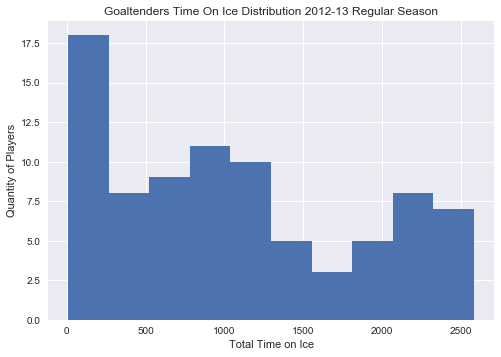

In [506]:
x4 = dglt.TTOI 
plt.title('Goaltenders Time On Ice Distribution 2012-13 Regular Season')
plt.xlabel('Total Time on Ice')
plt.ylabel('Quantity of Players')
#plt.xlim(260,280)
plt.hist(x4)
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_goaltenders_toi.pdf')
plt.show()

- Goaltenders that have played less than 270 minutes for the season are excluded from the cluster analysis. Since game level data is being used, those players will be ranked as bottom goaltenders.

In [508]:
low = dglt.copy()
low = low[low['TTOI'] < 270]
low.shape

(18, 60)

In [509]:
dglt = dglt[dglt['TTOI'] > 270]
dglt.shape

(65, 60)

In [1305]:
#dglt.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/total_stats_goaltenders_nhl_positions.csv', index='False', sep=',')
#dglt.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/total_stats_goaltenders_nhl_positions.csv', index='False', sep=',')

## clusters for goaltenders

In [521]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
g = dglt[['TSaveShotARatio', 'TShotGoalARatio']]
g_scaled = scaler.fit_transform(g)

### dendrogram

In [522]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [523]:
sn.clustermap(g_scaled, cmap=cmap, linewidths=.5)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### elbow analysis

In [524]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( g_scaled )
  cluster_errors.append( clusters.inertia_ )

In [525]:
clusters_dglt = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_dglt[0:10]

,cluster_errors,num_clusters
0,130.000000,1
1,48.465672,2
2,24.921483,3
3,14.539974,4
4,9.211440,5
5,5.922085,6
6,3.712192,7
7,2.428176,8
8,1.884630,9
9,1.614783,10


In [526]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_goaltenders_elbow_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dglt.to_latex())
f.write(endtex)
f.close()

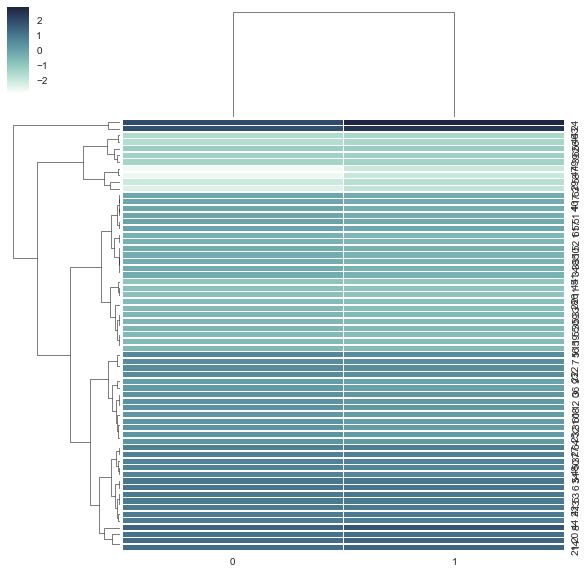

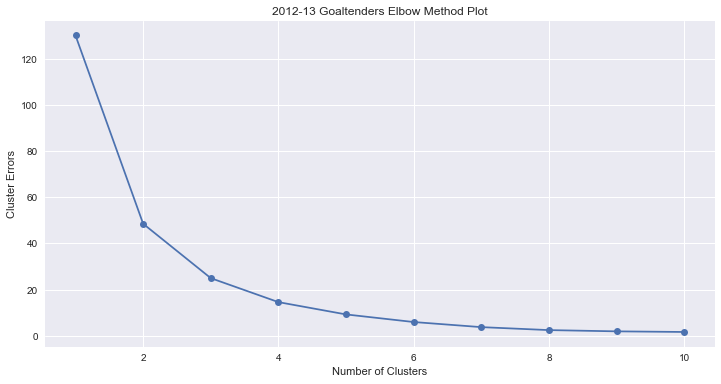

In [527]:
plt.figure(figsize=(12,6))
plt.plot( clusters_dglt.num_clusters, clusters_dglt.cluster_errors, marker = "o" )
plt.title('2012-13 Goaltenders Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_goaltenders_eblow_plot.pdf')
plt.show()

### silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.560646090547
For n_clusters = 3 The average silhouette_score is : 0.556381114852
For n_clusters = 4 The average silhouette_score is : 0.551297898814
For n_clusters = 5 The average silhouette_score is : 0.581383734087
For n_clusters = 6 The average silhouette_score is : 0.567824434074
For n_clusters = 7 The average silhouette_score is : 0.602606614931
For n_clusters = 8 The average silhouette_score is : 0.608546414908
For n_clusters = 9 The average silhouette_score is : 0.604056807467
For n_clusters = 10 The average silhouette_score is : 0.584492407102


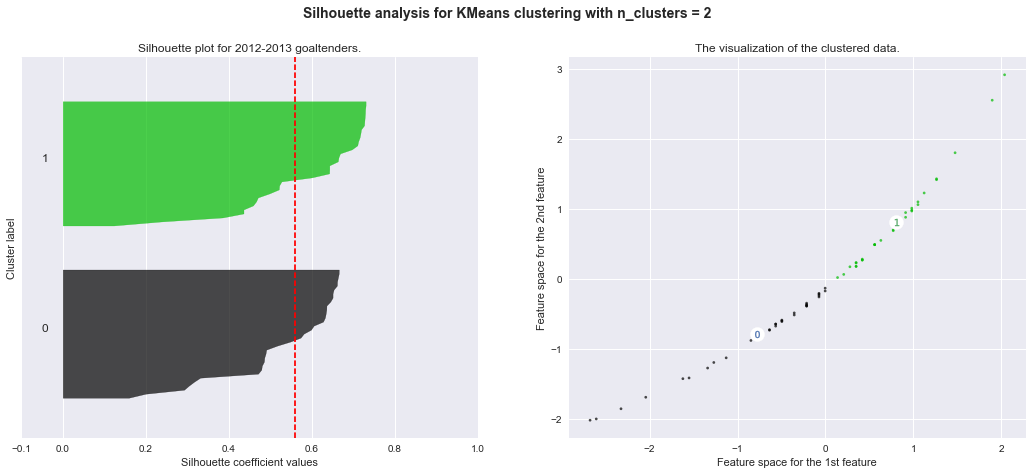

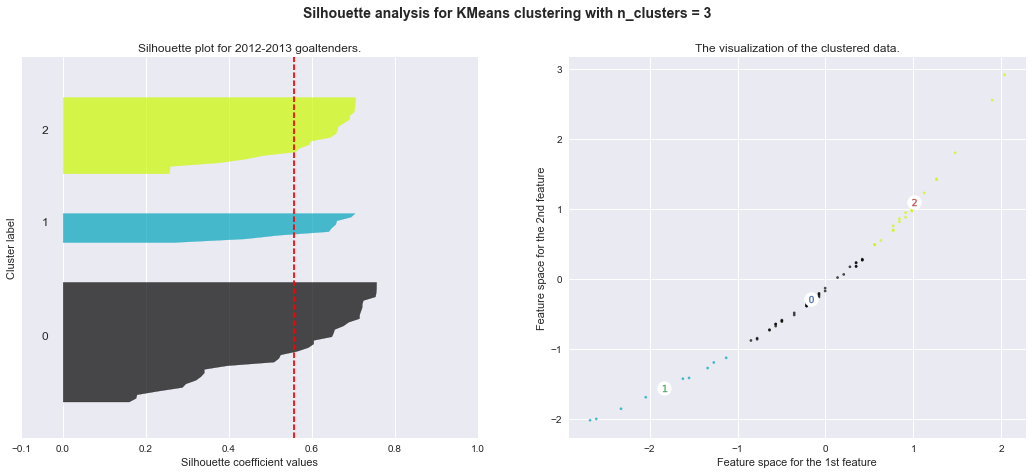

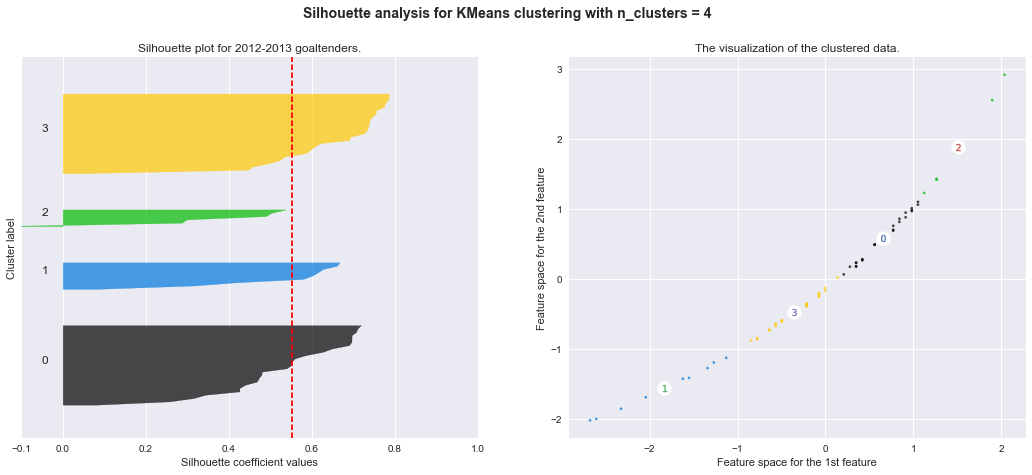

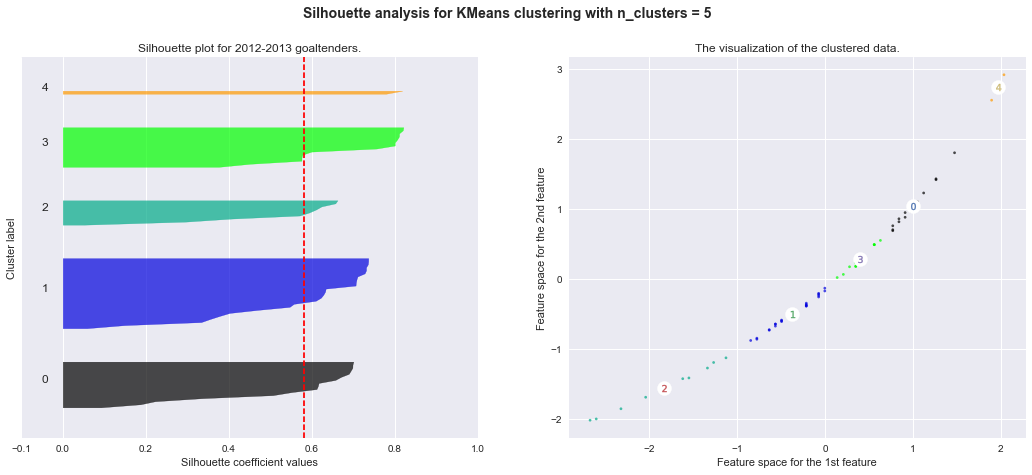

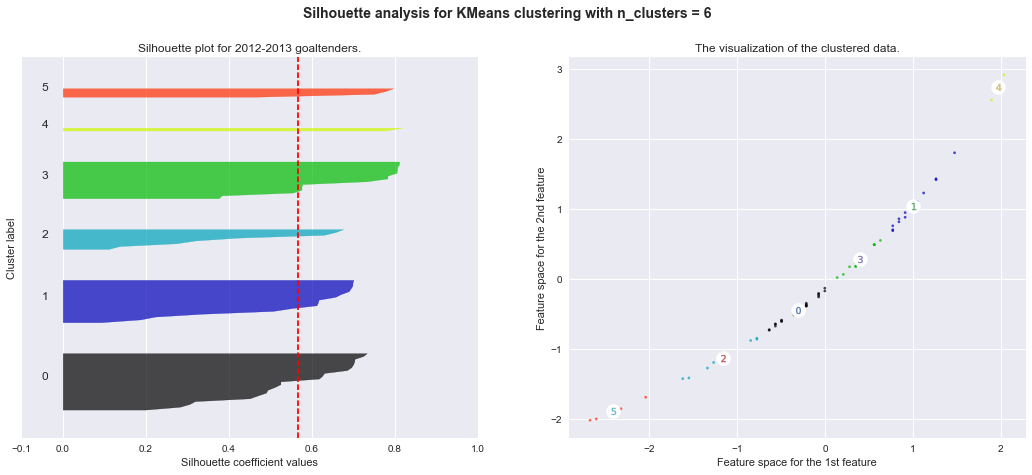

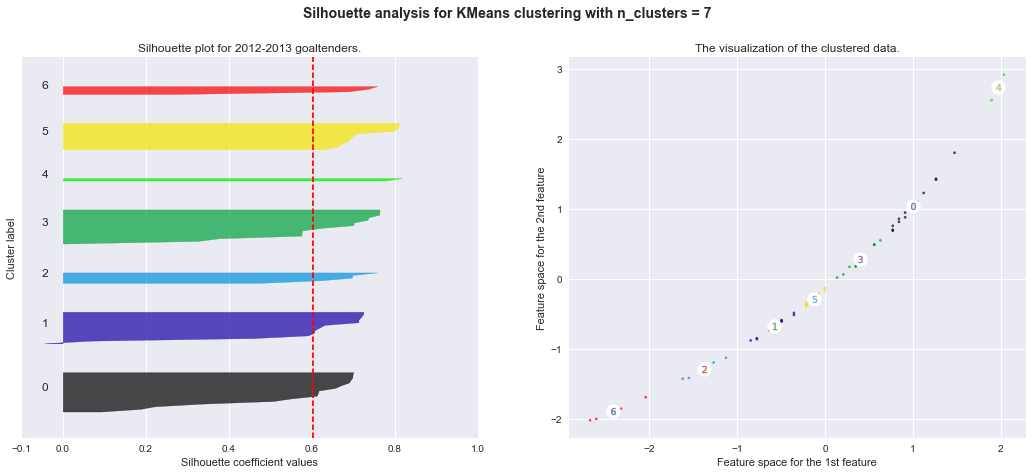

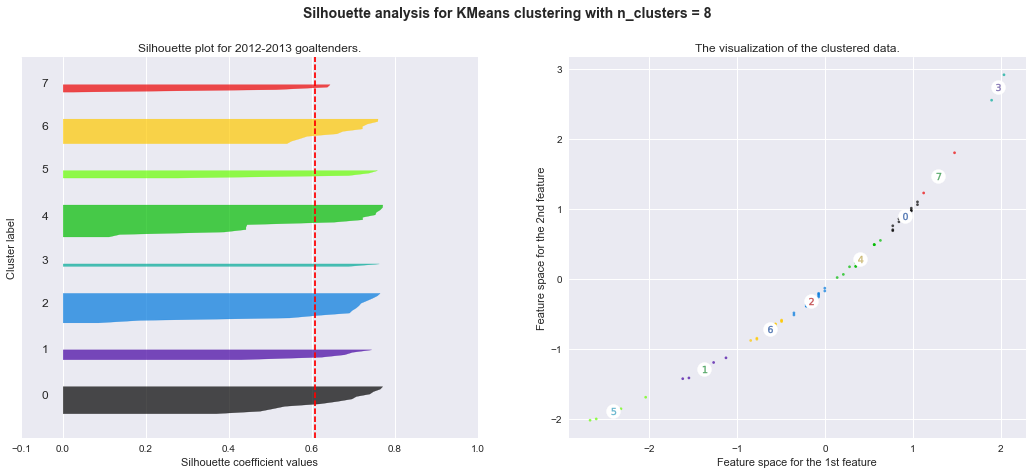

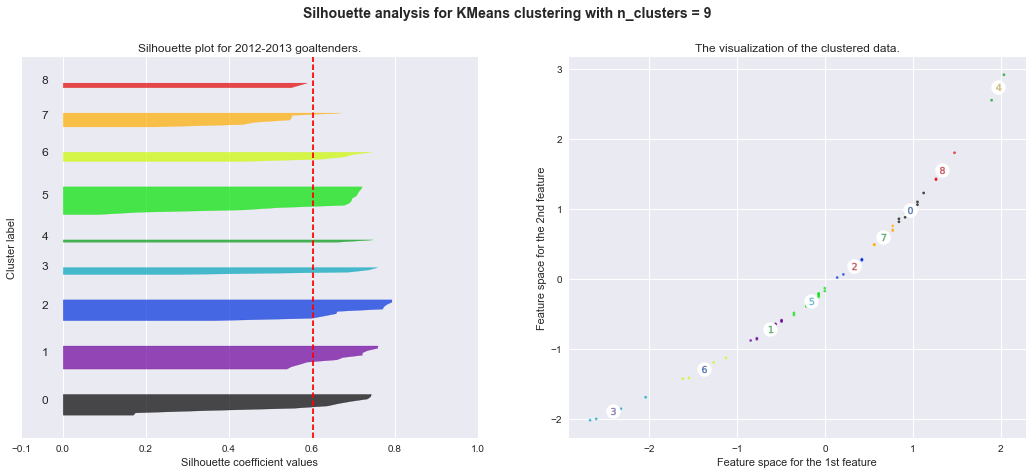

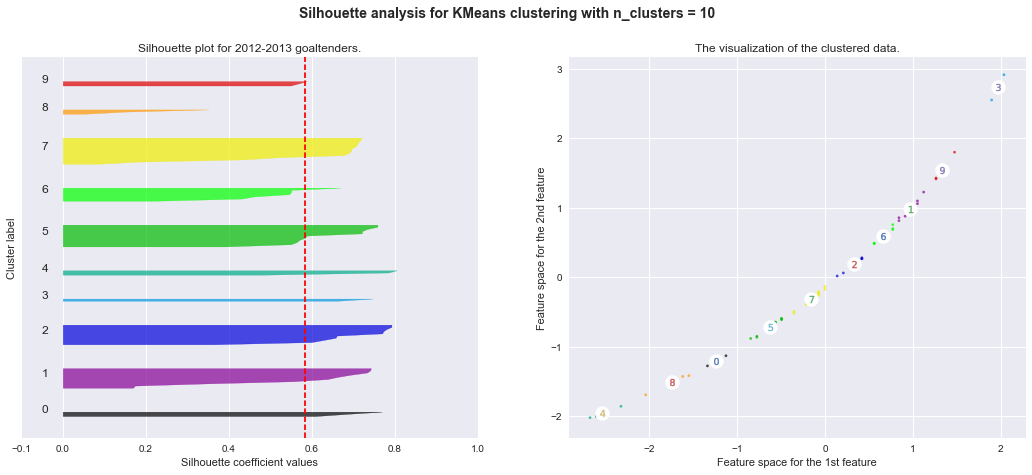

In [528]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(g_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
  cluster_labels = clusterer.fit_predict( g_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(g_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(g_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("Silhouette plot for 2012-2013 goaltenders.")
  ax1.set_xlabel("Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(g_scaled[:, 0], g_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.savefig('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_goaltenders_silhouette_analysis.pdf')
plt.show()

Silhouette analysis for KMeans clustering of goaltenders shows that the number of clusters with the highest values of the three statistics used, are $n$ = 3, 4, 10. These clusters have an average silhouette score of 0.441, 0.425 and 0.430 respectfully. 
This indicates that the most natural cluster size were within this range. From a hockey perspective, the optimal number of clusters for goaltenders are 3. 
- Top
- Average
- Bottom


In [532]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(g_scaled)

clusters_dglt = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TSaveShotARatio', 'TShotGoalARatio'])

dglt['cluster']=kmeans.labels_

clusters_dglt

,TSaveShotARatio,TShotGoalARatio
0,-0.166699,-0.296242
1,1.010386,1.095051
2,-1.840078,-1.557653


In [533]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_goaltenders_silhouette_method.tex', 'w')
f.write(beginningtex)
f.write(clusters_dglt.to_latex())
f.write(endtex)
f.close()

In [1316]:
#clusters_dglt.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/clusters_goaltenders.csv')
#clusters_dglt.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/clusters_goaltenders.csv')

### rank goaltenders

The next step is to rank players based on clusters:

- **Cluster 1** is for **1st** pairing defensemen (Top 2). 
- **Cluster 0** is for **2nd** pairing defensemen (Top 4). 
- **Cluster 2** is for **3rd** pairing defensemen (Bottom 2)

display the number of players per rank

In [534]:
dglt['Rank'] = dglt.apply(lambda x: 1 if (x['cluster'] == 1) else 2 if (x['cluster'] == 0) else 3, axis=1)
dglt = dglt.sort_values(['TSaves'], ascending=[False])
dglt['Rank'].value_counts()

2    34
1    22
3     9
Name: Rank, dtype: int64

In [535]:
g2 = dglt.copy()
g2 = g2[['Rank', 'TeamCode', 'PlayerName', 'TGP', 'TPoints', 'TSaveShotARatio', 'TShotGoalARatio', 'TEVSaveShotARatio', 'TEVShotGoalARatio',  'TSaves', 'TGoalsA', 'TShotsA', 'TOISaves', 'TOIGoalsA', 'TOIShotsA', 'TPoints', 'TOIPoints']]
g2 = g2[g2['Rank'] == 1]
g2 = g2.sort_values(['TSaveShotARatio', 'TEVShotGoalARatio'], ascending=[False, False])
g2.head(20)

,Rank,TeamCode,PlayerName,TGP,TPoints,TSaveShotARatio,TShotGoalARatio,TEVSaveShotARatio,TEVShotGoalARatio,TSaves,TGoalsA,TShotsA,TOISaves,TOIGoalsA,TOIShotsA,TPoints,TOIPoints
43,1,OTT,CRAIG ANDERSON,24,0.0,0.939,16.525,0.943,17.600,621.0,40.0,661,0.437016,0.028149,0.465165,0.0,0.000000
811,1,OTT,ROBIN LEHNER,12,0.0,0.937,15.885,0.935,15.348,387.0,26.0,413,0.526531,0.035374,0.561905,0.0,0.000000
349,1,CBJ,SERGEI BOBROVSKY,38,0.0,0.931,14.562,0.941,16.891,990.0,73.0,1063,0.446147,0.032898,0.479045,0.0,0.000000
119,1,BOS,TUUKKA RASK,36,1.0,0.928,13.884,0.938,16.000,889.0,69.0,958,0.422529,0.032795,0.455323,1.0,0.000475
81,1,CHI,COREY CRAWFORD,30,0.0,0.928,13.907,0.934,15.119,697.0,54.0,751,0.395798,0.030664,0.426462,0.0,0.000000
482,1,VAN,CORY SCHNEIDER,30,1.0,0.926,13.550,0.931,14.574,753.0,60.0,813,0.434507,0.034622,0.469129,1.0,0.000577
138,1,NYR,HENRIK LUNDQVIST,43,1.0,0.925,13.326,0.937,15.836,1060.0,86.0,1146,0.411491,0.033385,0.444876,1.0,0.000388
310,1,DET,JIMMY HOWARD,42,1.0,0.925,13.256,0.937,15.825,1005.0,82.0,1087,0.410875,0.033524,0.444399,1.0,0.000409
636,1,BUF,JHONAS ENROTH,12,0.0,0.924,13.167,0.931,14.421,292.0,24.0,316,0.468700,0.038523,0.507223,0.0,0.000000
580,1,CHI,RAY EMERY,21,0.0,0.924,13.118,0.927,13.643,412.0,34.0,446,0.369176,0.030466,0.399642,0.0,0.000000


# combine center, winger, defenseman and goaltender dataframes

In [536]:
dataframes = [dc, dw, dwd,dglt]
#dataframes = [dww, dwd]
dr = pd.concat(dataframes)
dr = dr.sort_values(['Position', 'Rank'], ascending=[True, True])
dr.head()

,PlayerName,Position,Rank,Season,TAssists,TBlocks,TDShots,TEVDShots,TEVGoalsA,TEVGoalsF,TEVSaveShotARatio,TEVSaves,TEVShotGoalARatio,TEVShotsA,TEVShotsF,TGP,TGiveaways,TGoals,TGoalsA,TGoalsF,THits,TMisses,TOIAssists,TOIBlocks,TOIDShots,TOIEVDShots,TOIEVGoalsA,TOIEVGoalsF,TOIEVSaveShotARatio,TOIEVSaves,TOIEVShotGoalARatio,TOIEVShotsA,TOIEVShotsF,TOIGiveaways,TOIGoals,TOIGoalsA,TOIGoalsF,TOIHits,TOIMisses,TOIPenalties,TOIPlus/Minus,TOIPoints,TOISaveShotARatio,TOISaves,TOIShotGoalARatio,TOIShots,TOIShotsA,TOIShotsF,TOITakeaways,TPenalties,TPlus/Minus,TPoints,TSaveShotARatio,TSaves,TShotGoalARatio,TShots,TShotsA,TShotsF,TTOI,TTakeaways,TeamCode,cluster
228,STEVEN STAMKOS,C,1,2012,28.0,17.0,89,-20,47.0,45.0,NaN,NaN,NaN,421,401,48,31.0,29.0,52.0,68.0,63.0,68.0,0.026490,0.016083,0.084201,-0.018921,0.044465,0.042573,NaN,NaN,NaN,0.398297,0.379376,0.029328,0.027436,0.049196,0.064333,0.059603,0.064333,0.030274,-0.001892,0.053926,NaN,NaN,NaN,0.121097,0.424787,0.508988,0.022706,32.0,-2.0,57.0,NaN,NaN,NaN,128.0,449,538,1057.0,24.0,T.B,0
19,SIDNEY CROSBY,C,1,2012,41.0,17.0,175,56,22.0,50.0,NaN,NaN,NaN,301,357,36,28.0,15.0,22.0,73.0,21.0,44.0,0.053947,0.022368,0.230263,0.073684,0.028947,0.065789,NaN,NaN,NaN,0.396053,0.469737,0.036842,0.019737,0.028947,0.096053,0.027632,0.057895,0.021053,0.036842,0.073684,NaN,NaN,NaN,0.143421,0.430263,0.660526,0.019737,16.0,28.0,56.0,NaN,NaN,NaN,109.0,327,502,760.0,15.0,PIT,0
266,ERIC STAAL,C,1,2012,35.0,23.0,72,-39,41.0,51.0,NaN,NaN,NaN,465,426,48,24.0,18.0,47.0,68.0,34.0,53.0,0.034722,0.022817,0.071429,-0.038690,0.040675,0.050595,NaN,NaN,NaN,0.461310,0.422619,0.023810,0.017857,0.046627,0.067460,0.033730,0.052579,0.053571,0.009921,0.052579,NaN,NaN,NaN,0.132937,0.510913,0.582341,0.047619,54.0,10.0,53.0,NaN,NaN,NaN,134.0,515,587,1008.0,48.0,CAR,0
261,MIKE RIBEIRO,C,1,2012,36.0,28.0,42,-101,30.0,27.0,NaN,NaN,NaN,402,301,48,22.0,13.0,33.0,67.0,55.0,22.0,0.042056,0.032710,0.049065,-0.117991,0.035047,0.031542,NaN,NaN,NaN,0.469626,0.351636,0.025701,0.015187,0.038551,0.078271,0.064252,0.025701,0.061916,-0.003505,0.057243,NaN,NaN,NaN,0.058411,0.482477,0.531542,0.025701,53.0,-3.0,49.0,NaN,NaN,NaN,50.0,413,455,856.0,22.0,WSH,0
464,RYAN GETZLAF,C,1,2012,34.0,42.0,123,53,25.0,41.0,NaN,NaN,NaN,303,356,44,31.0,15.0,30.0,61.0,89.0,41.0,0.038245,0.047244,0.138358,0.059618,0.028121,0.046119,NaN,NaN,NaN,0.340832,0.400450,0.034871,0.016873,0.033746,0.068616,0.100112,0.046119,0.046119,0.017998,0.055118,NaN,NaN,NaN,0.093363,0.391451,0.529809,0.030371,41.0,16.0,49.0,NaN,NaN,NaN,83.0,348,471,889.0,27.0,ANA,0


In [537]:
dr['Rank'].value_counts()

2    313
1    246
3    183
4     58
Name: Rank, dtype: int64

In [538]:
dr.shape

(800, 62)

- create and save new dataframe that contains season, team code, player number, player name, position and rank columns.

In [539]:
drs = dr[['Season', 'TeamCode', 'PlayerName', 'Position', 'Rank']]

In [540]:
drs.shape

(800, 5)

In [541]:
drs.head()

,Season,TeamCode,PlayerName,Position,Rank
228,2012,T.B,STEVEN STAMKOS,C,1
19,2012,PIT,SIDNEY CROSBY,C,1
266,2012,CAR,ERIC STAAL,C,1
261,2012,WSH,MIKE RIBEIRO,C,1
464,2012,ANA,RYAN GETZLAF,C,1


In [542]:
drs.isnull().sum()

Season        0
TeamCode      0
PlayerName    0
Position      0
Rank          0
dtype: int64

unclustered forwards will be added to the bottom line (4th) per position. Unclustered defensemen and goaltenders will be added to bottom defensive paring and bottom goaltender respectfully.

In [543]:
drs.to_csv('/Users/stefanostselios/Brock University/Kevin Mongeon - StephanosShare/out/clusters/2012_player_rank.csv')
#dr.to_csv('/Users/kevinmongeon/Brock University/Steve Tselios - StephanosShare/out/clusters/2012_player_rank.csv')